# CREDIT CARD FRAUD ANALYSIS 

### Data Scource:

file obtained through the Kaggle platform.



## Problem statement:-
The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

### Variable information:

Time:    Time elapsed in seconds between the current transaction and the first transaction of the data set.

Amount:  Transaction amount. The dataset description page on Kaggle does not say which currency is being used, but it is            
         assumed to be the Euro as these are financial transactions taking place in Europe.

Class:   Response variable. Indicates the type of transaction as to its legitimacy.
         
         When: it is 0, it is a normal transaction; 
         
              if 1, it is a fraudulent one.
         

V1 to V28:  Columns with numeric values that, in order to preserve confidential information, were mischaracterized using a              
           process called PCA (Principal Component Analysis).

### The PCA process
PCA is an algorithm that is used to transform a large data set into a smaller one, while trying to preserve as much information as possible. This process finds a new set of variables, called components, which has fewer or equal variables than the original dataset. The idea of the algorithm is to perform linear transformations on the original data in order to find and suppress strongly correlated data and save weakly correlated data. 

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stt

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

## Data Preparation:

In [2]:
# reading the data

df = pd.read_excel(r"creditcard.xlsx")

In [3]:
# reading top 5 data from dataset of credit card

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# reading last 5 rows

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [120]:
## Checking data with class =1

df[df['Class']==1].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


## EDA 

In [5]:
# shape

df.shape

(284807, 31)

In [6]:
#datatypes

df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# use 'info()' to understand the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# checking column names

df.columns.to_list()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

#### Handling missing values

In [12]:
# Cheking percent of missing values in columns
# 'isnull().sum()' returns the number of missing values in each variable
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0


In [13]:
#Check Duplicates
#Identifying duplicate rows in the dataset
df.duplicated().sum()

1081

In [14]:
# Delete duplicate rows
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(283726, 31)

In [16]:
print("Number of rows = {0} and Number of Columns = {1} in the Data frame after removing the duplicates.".format(df.shape[0], df.shape[1]))

Number of rows = 283726 and Number of Columns = 31 in the Data frame after removing the duplicates.


#### Data Cleaning Process:

No null values has been observed in the dataframe.

No missing values has been observed in the dataframe. 

There were 1081 duplicates observed in the dataset, and the same has been removed. 

After Data cleaning, 283726 Rows and 31 columns are present in the dataframe.

### Basic Statistics :

In [9]:
# basic statistics in transposed 

df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.205498e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406306e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
# Amount column stats

df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
## Time column stats

df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

## Visualization:

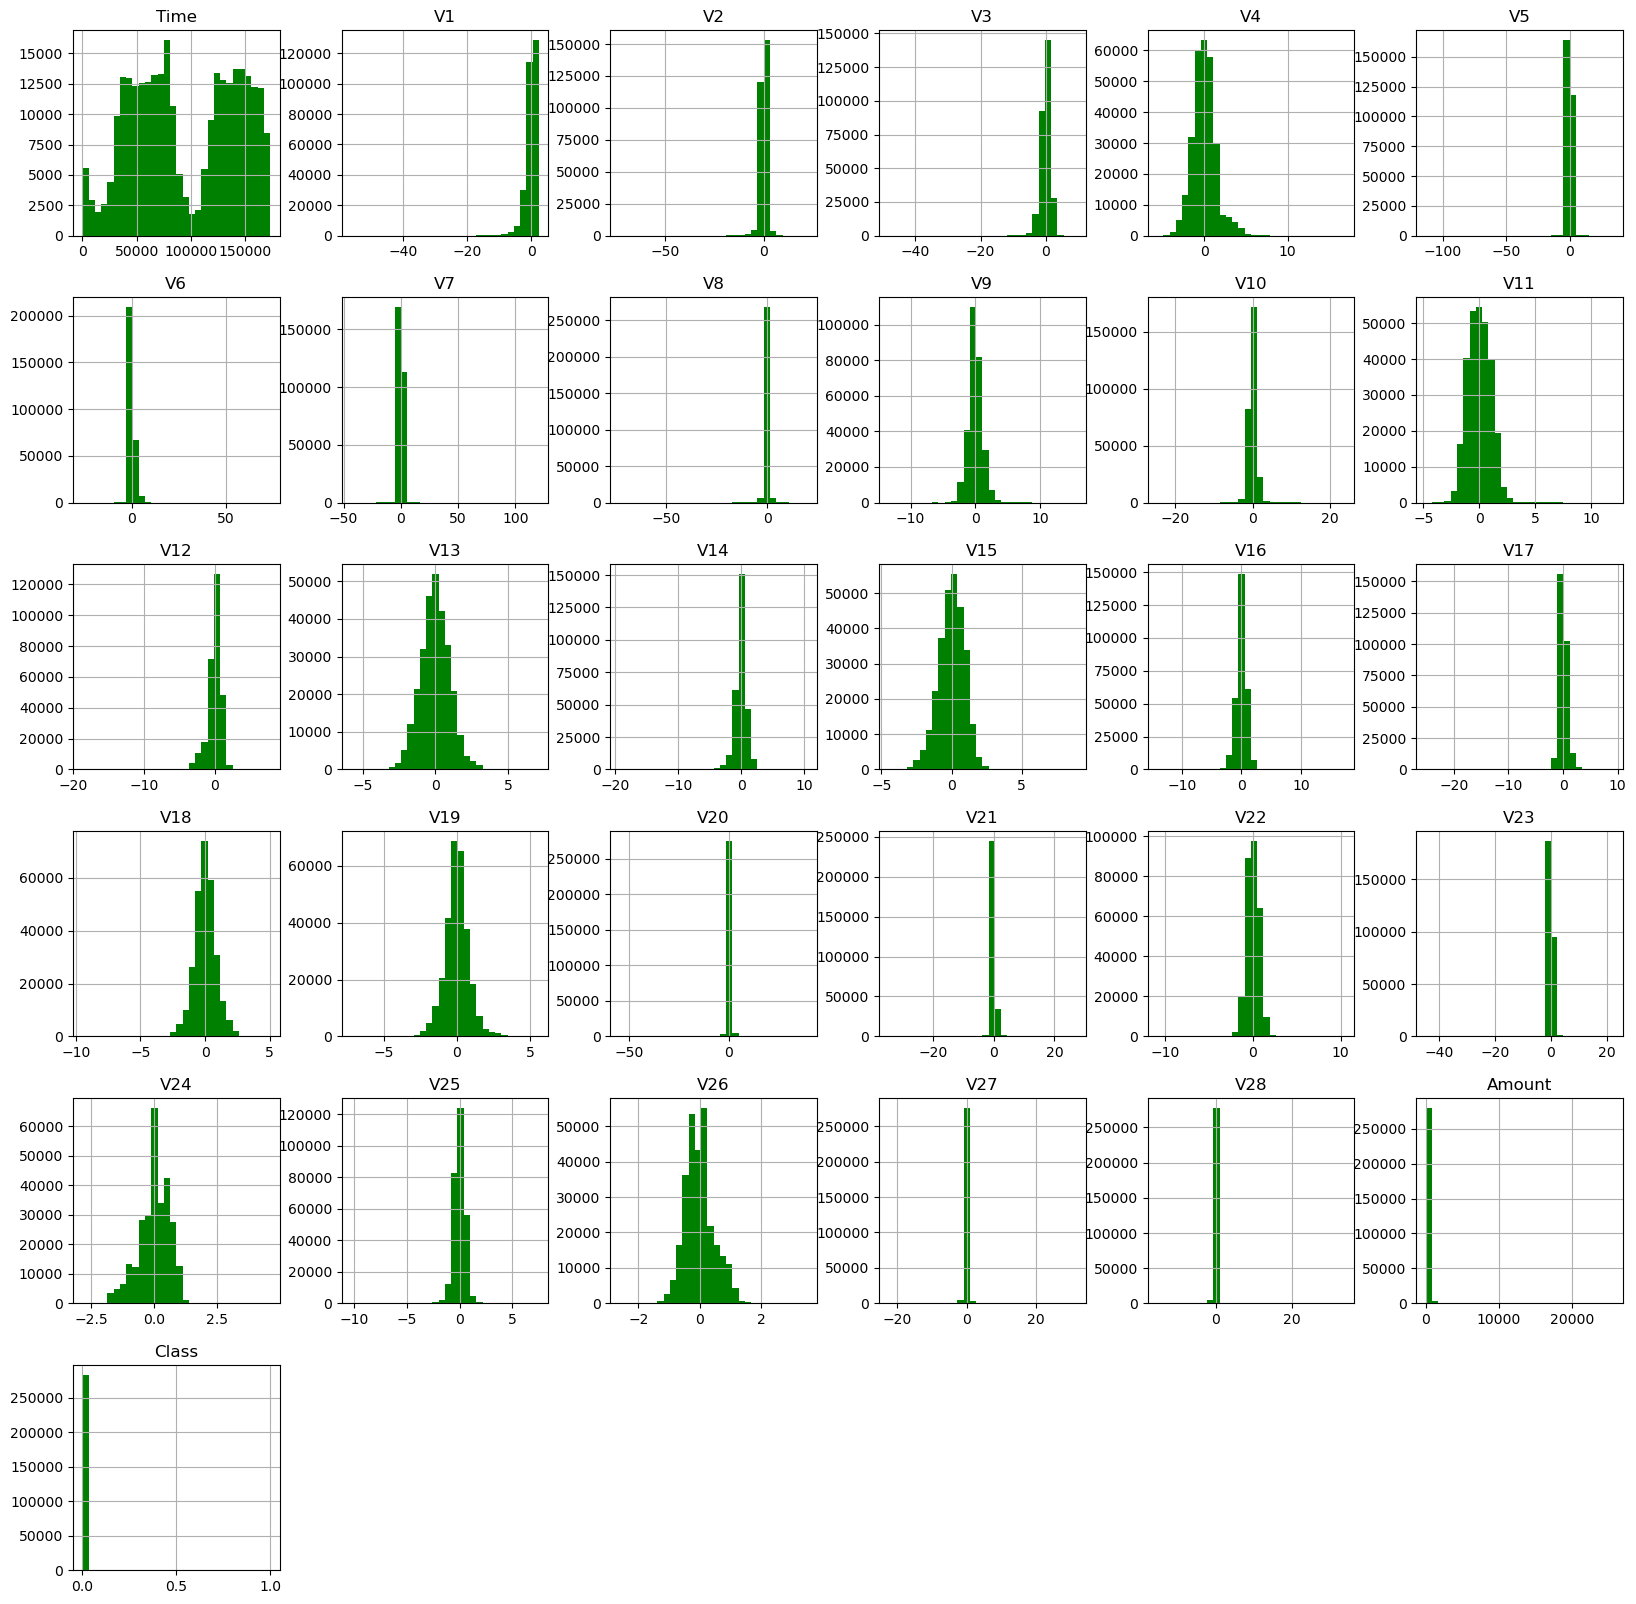

In [17]:
# Plot the histograph
df.hist(bins = 30, color = 'g',figsize = (20,20))
plt.show()

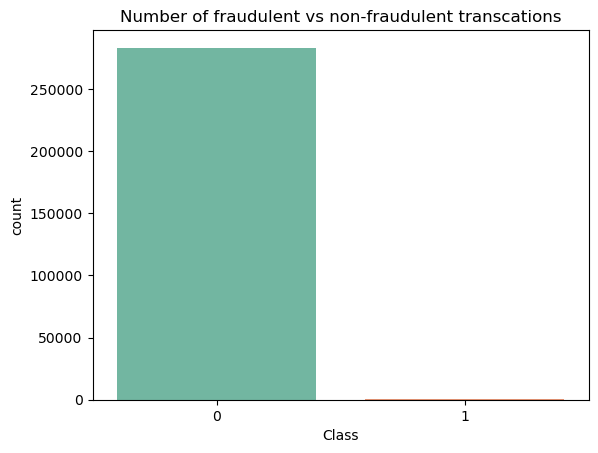

In [18]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df,palette = "Set2" )
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

In [19]:
classes = df['Class'].value_counts()
classes

Class
0    283253
1       473
Name: count, dtype: int64

In [20]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [21]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

As you can see from the graph above, frauds represents such a small proportion of total transactions that they barely appear in the graph above. So we will have to perform a data balancing to improve the performance of our machine learning models .

In [22]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]

# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

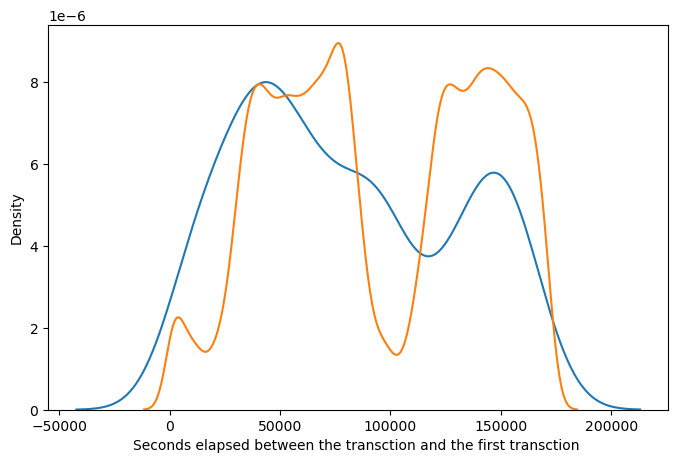

In [23]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction ')
plt.show()

##### Analysis:
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

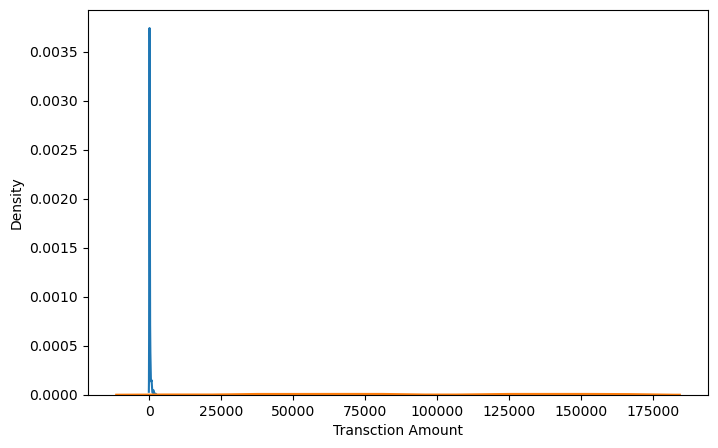

In [24]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

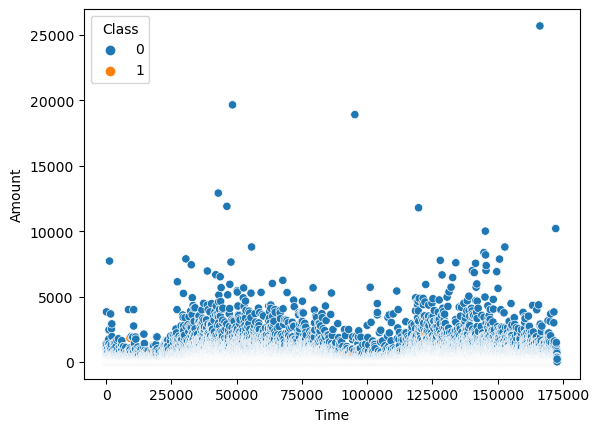

In [25]:
figsize=(15, 10)
sns.scatterplot(x=df['Time'],y=df['Amount'],hue=df['Class'])
plt.show()

Fraudulent actitvities  persist in lower range of amount over period of time.

And shows that time column has no relation with fraudulent transcations.

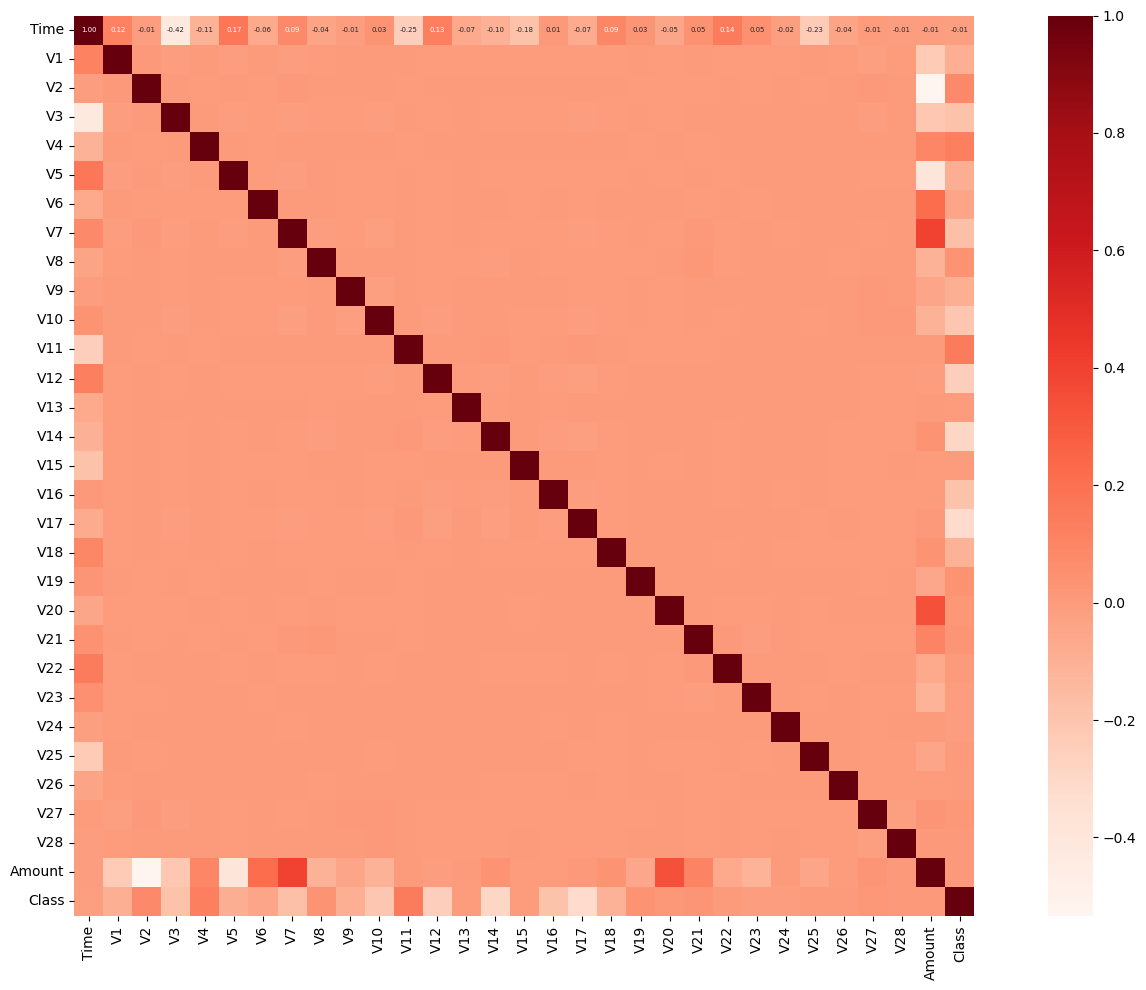

In [26]:
# heatmap
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, fmt='.2f', square=True, linecolor='white', cmap='Reds', vmax=1.0,annot=True,annot_kws={'size':5.0},mask=None);
plt.tight_layout()

The heatmap above shows that there is a weak correlation among these variables. Only a slight inverse correlation between variables V2 and Amount

In [27]:
df[["Amount","V7","V2","V20"]].corr()

,Amount,V7,V2,V20
Amount,1.000000,0.400408,-0.533428,0.340729
V7,0.400408,1.000000,0.007425,-0.001192
V2,-0.533428,0.007425,1.000000,-0.001287
V20,0.340729,-0.001192,-0.001287,1.000000


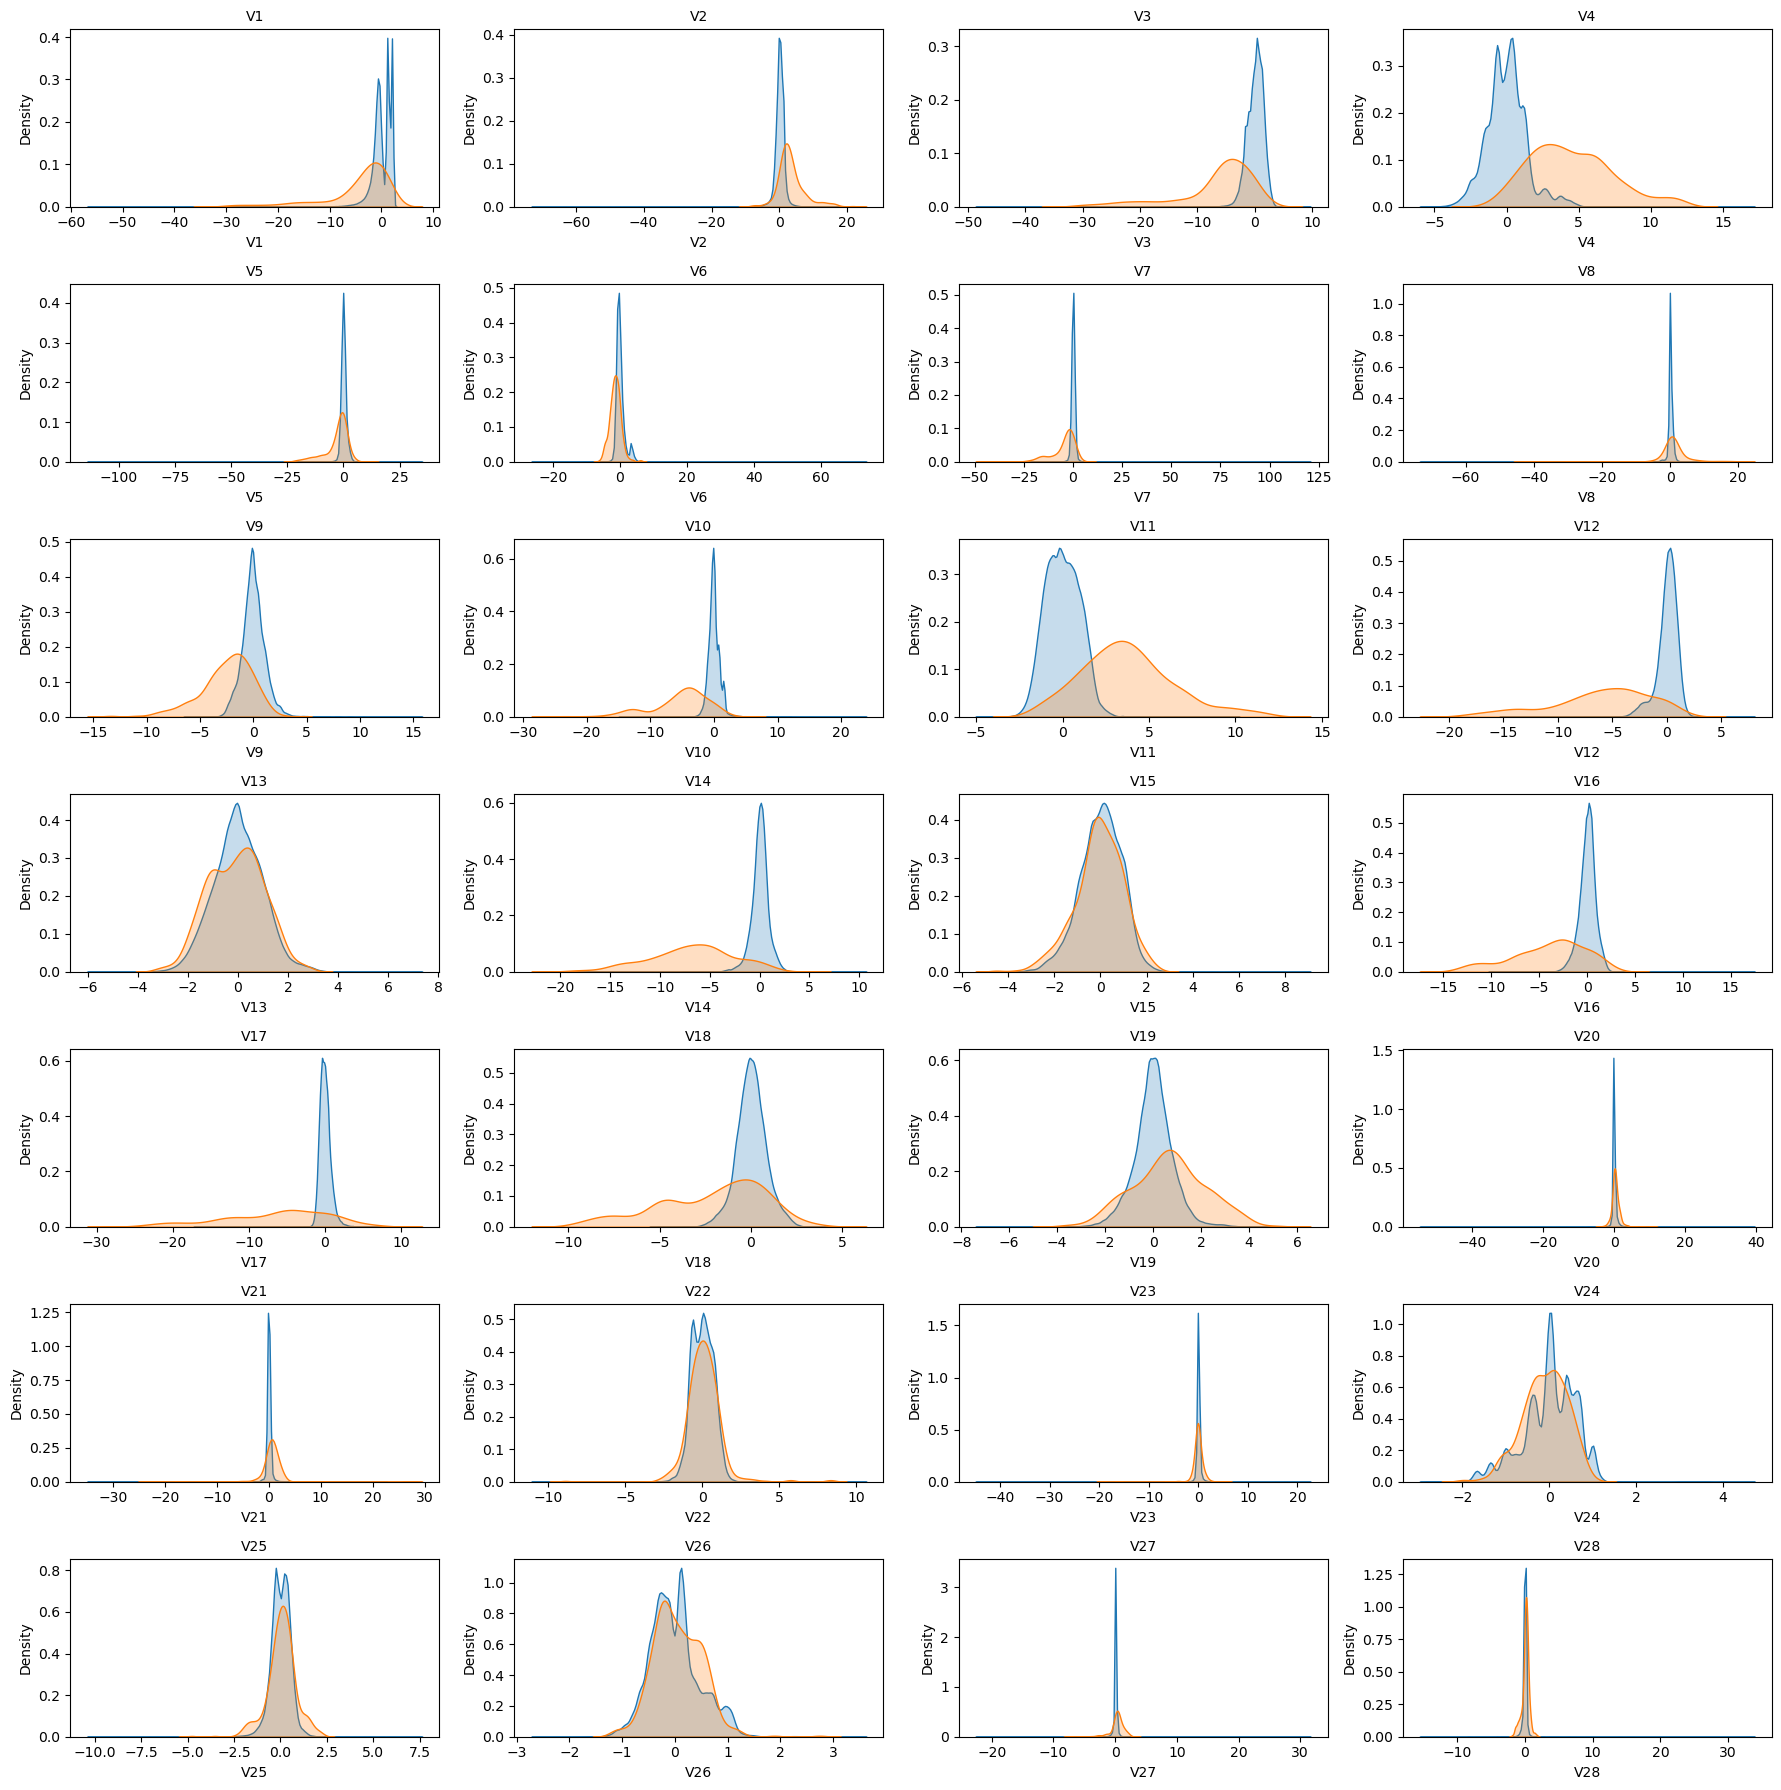

In [28]:
# Ploting a correlation matrix
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    #sns.kdeplot(df,x=col, hue="Class", fill=True)
    sns.kdeplot(df_class_0[col], label="Class 0", fill=True)
    sns.kdeplot(df_class_1[col], label="Class 1", fill=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

On the figure above, regions in blue corresponds to the normal transactions and the ones in orange corresponds to the frauds. Notice that some variables, such as V3, V4, V11 and V14 present a behavior very different according to the type of transcions. As for variables such as V15, V22 and V26, they present a similar behavior.

From the analysis of amount and time graph we concluded the time column is not significant , so we can drop time column

In [29]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

## Train-Test Split

In [30]:
# Importing  library train_test_split

from sklearn.model_selection import train_test_split

In [31]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [32]:
# Putting target variable to y
y = df['Class']

In [33]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [34]:

# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

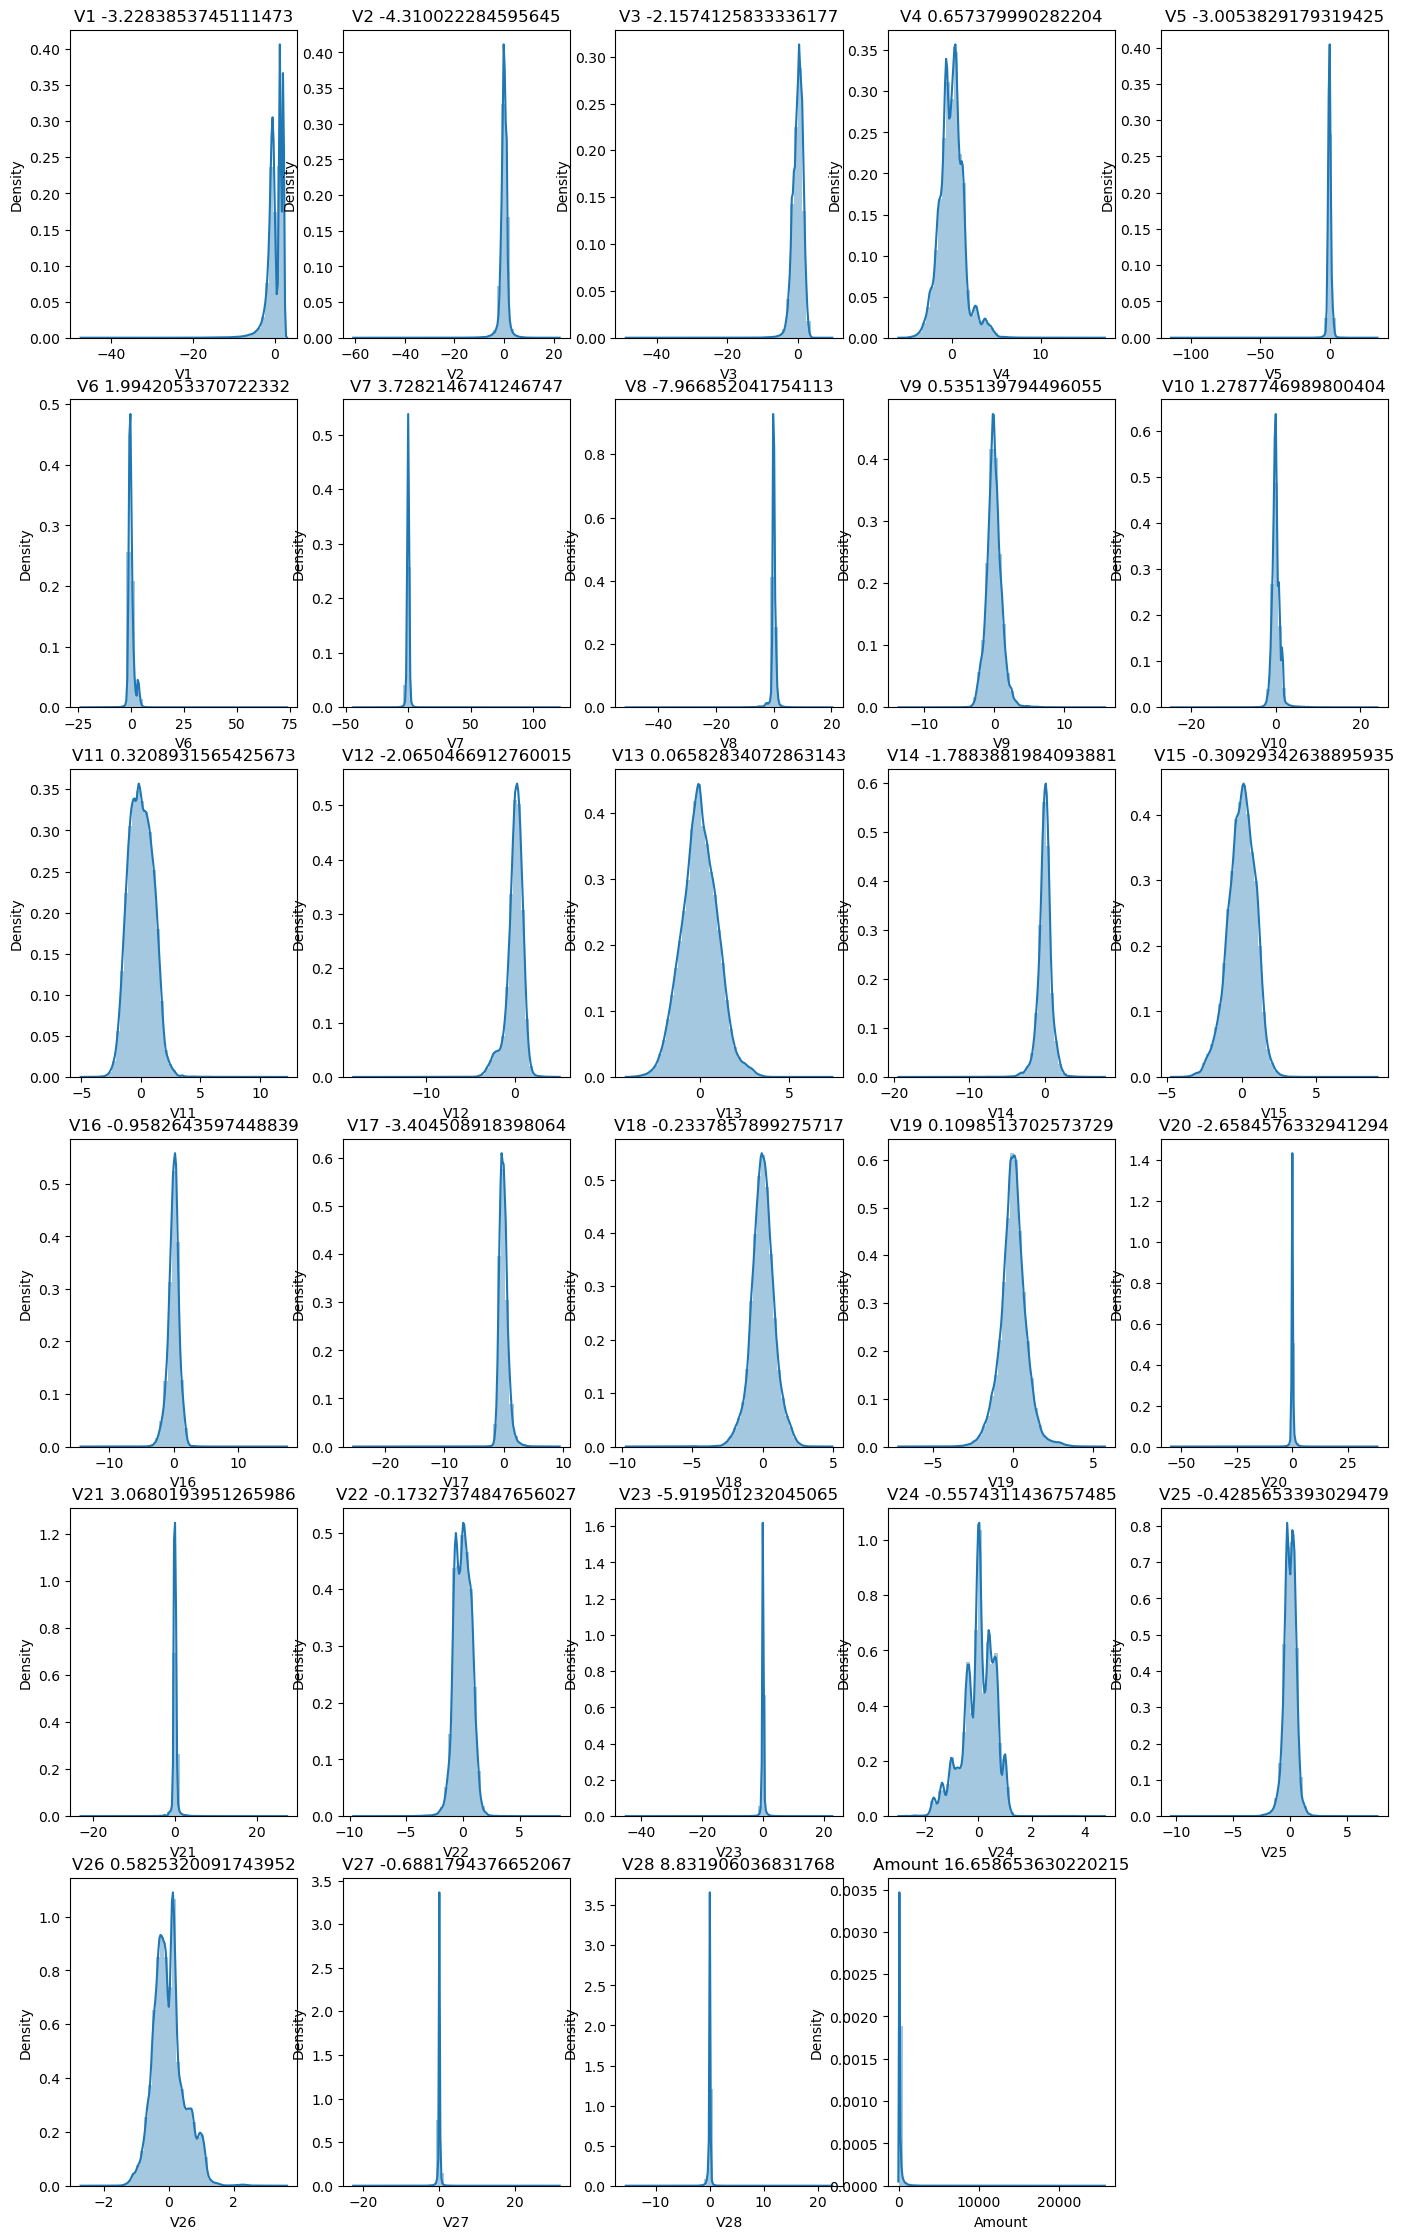

In [35]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

## Feature Engineering


Data Cleaning Standardisation of dataset It is better idea to scale the features before using the dataset so that all the values come in similar range. This is important so that features with lesser significance might not end up dominating the more significant features due to its larger range.

Different types of Scaling-Log, Standardization and Normalization is used. We’ll decide which of these to choose from depending on our dataset.

Log is a scaling technique which is done when the variables span several orders of magnitude.

Standardization is a scaling technique are the ones where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Normalization (Min-Max Scaling) is a scaling technique in which values are shifted and are then rescaled so that they end up ranging between 0 and 1.

In [36]:
scaler = StandardScaler()

In [37]:
# Fit the data into scaler and transform
#transforming the Amount Column
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49578,-1.550810,0.731824,2.549028,2.733753,0.250049,2.870749,0.354236,0.007231,-0.037368,1.419594,0.353819,0.155074,0.508928,-1.089066,1.649045,-1.580001,1.105292,-1.949885,-0.496137,-0.312468,0.005203,0.831394,0.117041,-0.935059,-0.665162,0.188614,-0.910417,-0.273559,0.008282
56032,-1.305339,1.059107,1.586936,1.650134,1.669107,-0.680811,0.717706,0.072364,-1.664982,-0.693306,0.096603,0.042417,0.894056,-1.381493,0.178974,0.897434,0.498896,-0.311887,-1.983888,0.117144,-0.101308,-0.557447,-0.121542,-0.058211,0.390341,-0.219061,0.017214,0.108434,-0.324396
272370,-1.498534,1.268183,-1.360645,-1.310035,2.744320,3.666680,0.234403,0.502133,0.313536,1.060169,-0.025439,-0.076493,-0.243640,0.061302,0.775102,-0.770121,-0.125204,-0.766155,1.048732,-0.053535,-0.067233,-0.546292,0.212806,0.703104,-0.805702,0.195482,-1.110255,0.304176,-0.341687
13917,1.198304,0.378397,0.541355,0.835317,-0.386506,-0.829408,-0.137542,-0.121206,1.122380,-0.470237,2.673207,-1.792756,1.225683,1.459839,-0.301539,0.611062,0.579947,0.467442,-0.185761,-0.149218,-0.377945,-0.909802,0.158471,0.420259,0.117492,0.027304,-0.057095,0.015486,-0.340489
132654,-0.833194,0.769305,0.865990,-2.250385,1.018626,0.090372,0.751702,0.149752,-0.268840,-0.716749,0.450716,0.846116,0.862594,-0.052840,-0.598100,0.980867,-1.410956,-0.217598,-1.172326,-0.038624,-0.020569,-0.044707,-0.211529,-1.094250,-0.174526,0.678921,0.117100,0.158518,-0.351151


In [38]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
174240,1.933240,-1.316851,0.425610,-0.354184,-1.854467,-0.021007,-1.602457,0.219034,0.271361,0.937272,0.608522,0.672180,0.338396,-0.389309,0.109958,-0.501147,-0.679960,2.170195,-1.004120,-0.484497,-0.069772,0.311095,0.293697,0.082676,-0.745557,0.597068,0.016508,-0.031391,-0.139189
277496,-1.592290,1.511862,-1.410847,-1.175748,2.867225,3.524474,0.495902,1.614884,-1.271709,-1.257424,-0.754626,0.138662,-0.534703,1.164244,-0.758920,-0.284964,-0.170883,-0.526737,-0.826569,-0.379965,0.100349,-0.083137,-0.474007,0.695183,1.356110,-0.486276,-0.350054,-0.118218,-0.183394
105198,-0.976564,0.585510,-0.003142,-0.945268,3.539277,2.916666,0.460135,0.831828,-1.095137,-0.601215,-0.305021,-0.245658,-0.277591,0.588377,0.340338,0.388287,-1.014098,-0.114375,-0.198850,0.101061,-0.297875,-1.264529,-0.179137,0.936423,0.677656,-0.705164,0.000772,0.064120,-0.346758
227782,1.780293,-1.063671,0.680026,0.841410,-1.653529,0.392116,-1.514345,0.467485,2.093653,0.028845,0.071605,0.465802,-1.627510,-0.424180,-1.020949,0.489706,-0.404125,0.818933,0.090235,-0.227392,0.203172,0.798490,0.178572,0.094661,-0.515228,0.371839,0.026977,-0.036803,-0.163268
116080,-1.153910,1.533617,0.434139,-0.495930,0.378126,-0.067809,0.530507,0.229062,0.300117,0.817031,0.349626,-0.382182,-0.910048,-0.384144,0.474690,0.870161,-0.666024,0.812769,0.558308,0.497949,-0.456433,-0.912641,-0.160596,-0.944142,0.048795,0.090333,0.100562,-0.249673,-0.314852


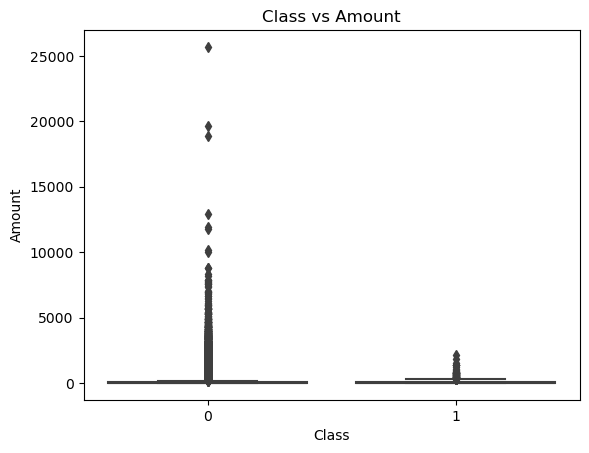

In [39]:
sns.boxplot(x ="Class",y="Amount",data=df)
plt.title("Class vs Amount")
plt.show()

In [40]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               226980
Model:                          Logit   Df Residuals:                   226951
Method:                           MLE   Df Model:                           28
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                    -inf
Time:                        17:15:23   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -2680.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -3.9228      0.014   -279.009      0.000      -3.950      -3.895
V2             3.9888      0.016  

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

In [43]:
#Inspect whether the 2 sets are indeed stratified.
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

Class
0    0.998414
1    0.001586
Name: proportion, dtype: float64
Class
0    0.998009
1    0.001991
Name: proportion, dtype: float64


Handling imbalanced data As the dataset is an imbalanced dataset, we can’t just simply use it raw and proced it into machine learning. It could cause a biased to the majority of the class that leads to a poor machine learning model.

So, we have to handle the imbalanced dataset first.

SMOTE is a technique where you do over-sampling to the minority class by filling out the gap between each value and then do under-sampling for the majority class so it meets in the middle.

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
#Apply SMOTE to create synthetic observations from minority class

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')

smote= SMOTE()
X_train_smote,y_train_smote=smote.fit_resample(X, y)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)

X_train:  (226980, 29)
y_train:  (226980,)
X_test:  (56746, 29)
y_test:  (56746,)


............


X_train_smote:  (566506, 29)
y_train_smote:  (566506,)
X_test_smote:  (56746, 29)
y_test_smote:  (56746,)


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier (class_weight='balanced', random_state=123)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=123)

This code initializes a RandomForestClassifier with the class_weight parameter set to 'balanced'. This is particularly useful when working with imbalanced datasets, as it adjusts weights inversely proportional to class frequencies in the input data. The random_state parameter ensures that the splits that you generate are reproducible. Setting random_state to a fixed value guarantees that the same sequence of random numbers is generated each time you run the code, which is useful for reproducibility.



In [47]:
importances = rf.feature_importances_
sorted(importances)

[0.0037041904538519074,
 0.005908493623942692,
 0.0063701891442294895,
 0.006613286366469747,
 0.006883634274583541,
 0.007315882095821706,
 0.007389413579664394,
 0.007979364340700503,
 0.008170235925853824,
 0.009072753768769518,
 0.010142145298748784,
 0.010840086964549881,
 0.011034059536942193,
 0.012119950388634676,
 0.012749392355973702,
 0.01340884169320569,
 0.01540228626907485,
 0.015907162529291287,
 0.016369565927613416,
 0.0249487716054291,
 0.026223111356081262,
 0.03546342367825739,
 0.038480508589922635,
 0.062419390612581345,
 0.06809294557474223,
 0.11833913873514276,
 0.12823500241071087,
 0.12988449528669388,
 0.180532277612517]

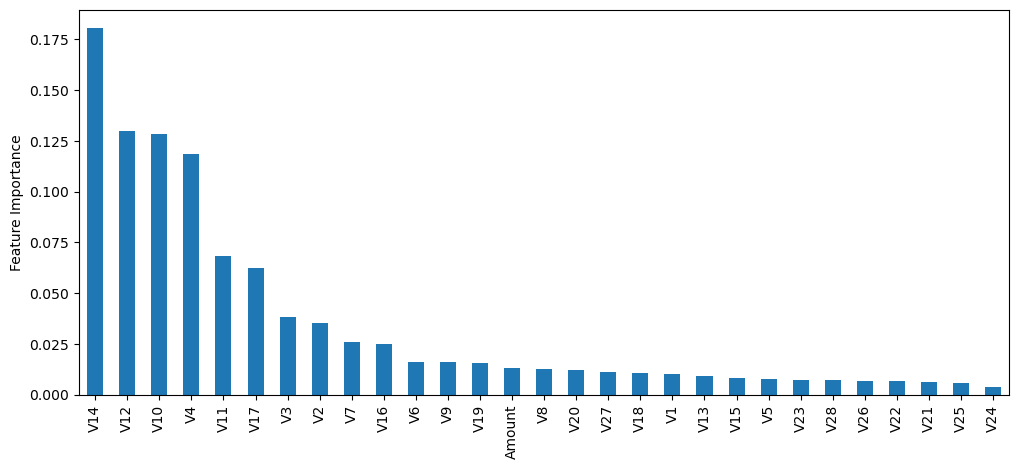

In [48]:
feature_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots(figsize=(12, 5))
feature_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
plt.show()

## Model Selection and Model Training

As we have a classification problem on our hands we will apply classification models and calculate the cross validation score to identify the best fit for our data.

Some of the models that we are going to use are.

1.LogisticRegression

2.DecisionTreeClassifier

3.RandomForestClassifier

4.XGBoost

## Logistic Regression Model

In [49]:
lr = LogisticRegression(class_weight='balanced',max_iter=200, random_state=123)
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=123)

In [50]:
pred_train = lr.predict(X_train)
pred = lr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[55065,  1568],
       [    8,   105]], dtype=int64)

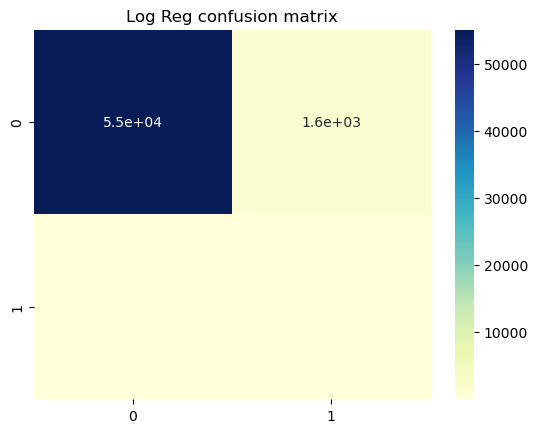

In [52]:
sns.heatmap(data=matrix, annot=True ,cmap="YlGnBu") 
plt.title('Log Reg confusion matrix')
plt.show() 

In [53]:
models_results = pd.DataFrame(columns=['Recall', 'Precision', 'F1', 'AUC'])

In [54]:
models_results

,Recall,Precision,F1,AUC


In [55]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn import metrics
from imblearn.pipeline import Pipeline, make_pipeline

In [56]:
def model_eval(y_test, predicted):
        
    accuracy = accuracy_score(y_test, predicted)*100
    precision = precision_score(y_test, predicted)*100
    recall = recall_score(y_test, predicted)*100
    f1 = f1_score(y_test, predicted)
    confusion_matrix =metrics.confusion_matrix(y_test, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()
    
    auc = np.NaN
    if auc:
        auc = metrics.roc_auc_score(y_test, predicted )*100
        fpr, tpr, threshold = roc_curve(y_test, predicted)
        plt.plot(fpr, tpr, label='Model', c='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', c='yellow')
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

    print('Accuracy:',accuracy  )
    print('Precision:', precision )
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('AUC:', auc)
    print('Classification Report:',classification_report)
    
    return [recall, precision, f1, auc]

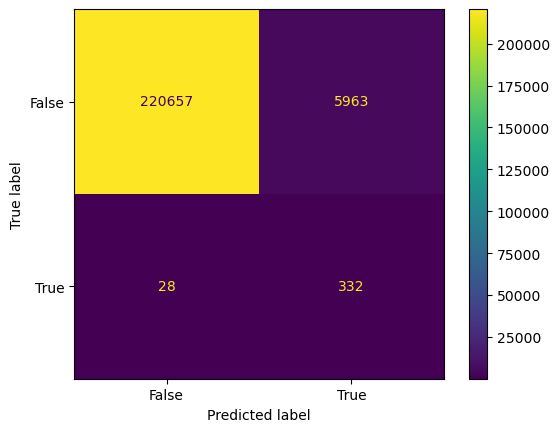

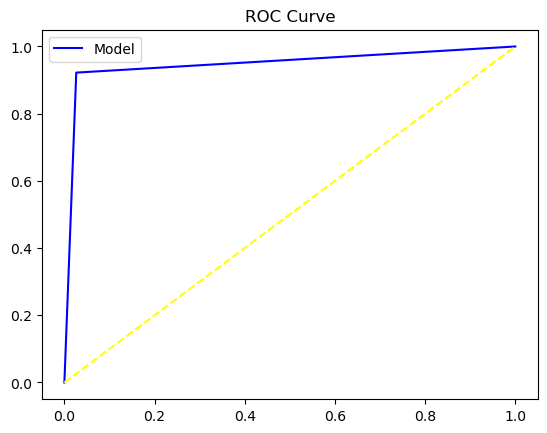

Accuracy: 97.36056040179751
Precision: 5.274027005559969
Recall: 92.22222222222223
F1 Score: 0.09977460555972953
AUC: 94.79547259729945
Classification Report: <function classification_report at 0x0000025F91804940>


[92.22222222222223, 5.274027005559969, 0.09977460555972953, 94.79547259729945]

In [57]:
model_eval(y_train,pred_train)

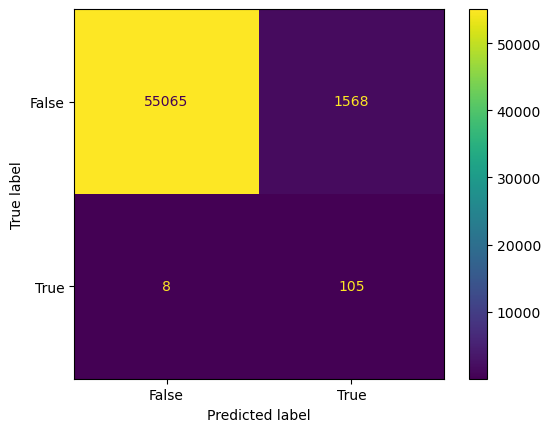

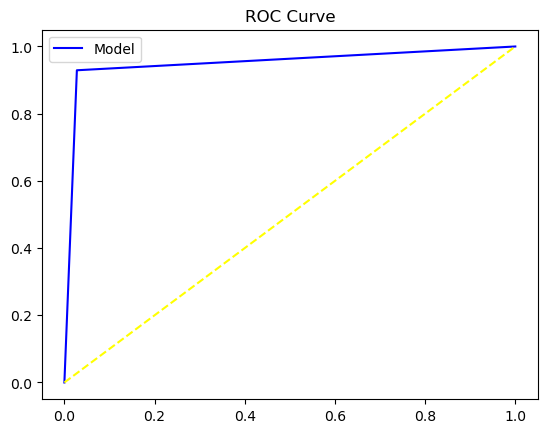

Accuracy: 97.22271173298559
Precision: 6.2761506276150625
Recall: 92.92035398230088
F1 Score: 0.11758118701007839
AUC: 95.07582511150429
Classification Report: <function classification_report at 0x0000025F91804940>


[92.92035398230088, 6.2761506276150625, 0.11758118701007839, 95.07582511150429]

In [58]:
model_eval(y_test, pred)

Hyperparameter Tuning

Hyperparameters are the parameters that need to be set before training the machine learning model. 

The values of these hyperparameters cannot be altered after the model has been trained. They play a vital role in the performance of the model.

In [59]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,accuracy_score,precision_score
from sklearn.metrics import classification_report,recall_score,f1_score

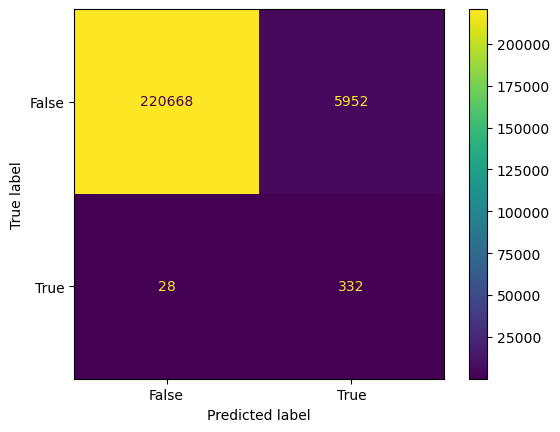

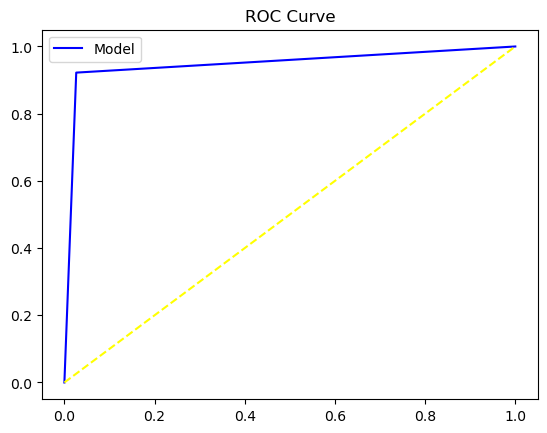

Accuracy: 97.36540664375715
Precision: 5.2832590706556335
Recall: 92.22222222222223
F1 Score: 0.09993979530403371
AUC: 94.79789956755803
Classification Report: <function classification_report at 0x0000025F91804940>


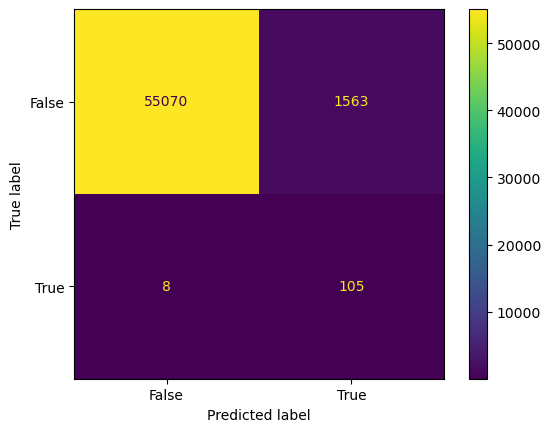

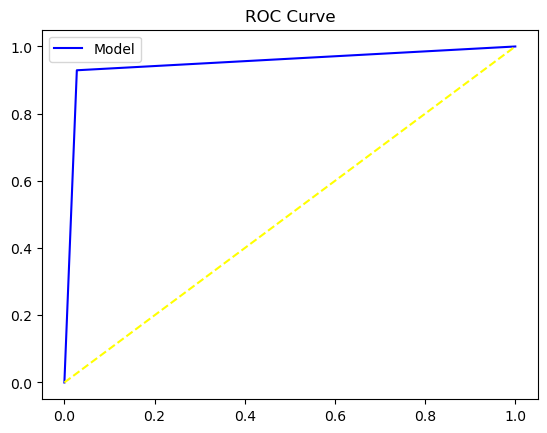

Accuracy: 97.23152292672611
Precision: 6.294964028776978
Recall: 92.92035398230088
F1 Score: 0.11791128579449749
AUC: 95.08023949887561
Classification Report: <function classification_report at 0x0000025F91804940>


NameError: name 'search' is not defined

In [60]:
from sklearn.model_selection import train_test_split,GridSearchCV
#Hyperparameter Tuning of LogicalRegression Model
param_grid = {'C' : [0.1, 1, 10, 100]}

lrclf = LogisticRegression(class_weight='balanced', max_iter=200, random_state=123, n_jobs=-1)
lrsearch = GridSearchCV(lrclf, param_grid, cv=5, scoring='recall')
lrsearch.fit(X_train, y_train)
lrpred_train = lrsearch.predict(X_train)
lrpred = lrsearch.predict(X_test)
model_eval(y_train,lrpred_train)
model_eval(y_test, lrpred)
print('Best parameters: ', search.best_params_)

In [61]:
matrix_gslog= confusion_matrix(y_test, lrpred)
matrix_gslog

array([[55070,  1563],
       [    8,   105]], dtype=int64)

Observations

Logistic Regression Model with hyperparameter tuning gives an accuracy of 98.07%.

### Lets see tree-based models.

## Decision Tree Model¶

In [62]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
pred_train_dt = dt.predict(X_train)
pred_dt = dt.predict(X_test)
pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
matrix_dt = confusion_matrix(y_test, pred_dt)
matrix_dt

array([[56595,    38],
       [   27,    86]], dtype=int64)

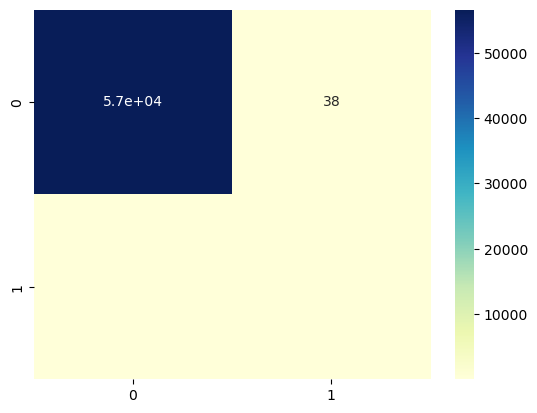

In [65]:
sns.heatmap(matrix_dt, annot=True , cmap="YlGnBu")
plt.show() 

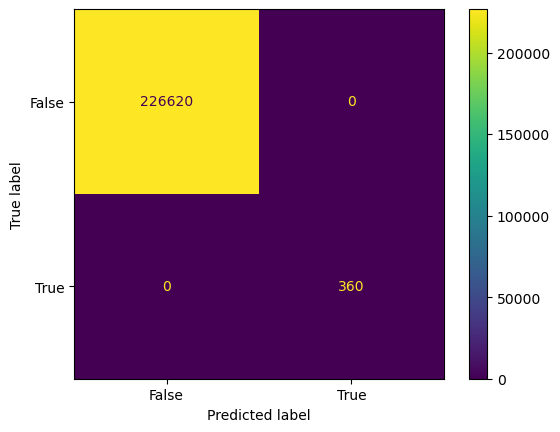

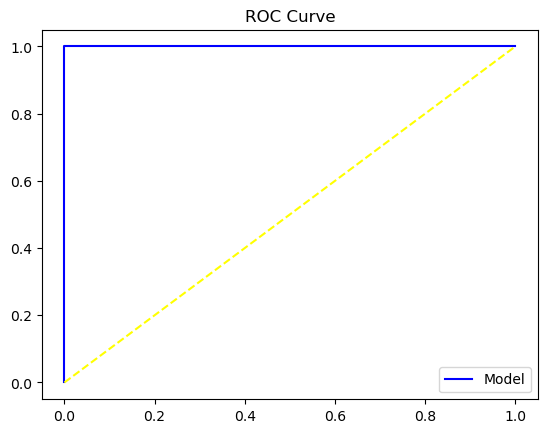

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 1.0
AUC: 100.0
Classification Report: <function classification_report at 0x0000025F91804940>


[100.0, 100.0, 1.0, 100.0]

In [66]:
model_eval(y_train,pred_train_dt )

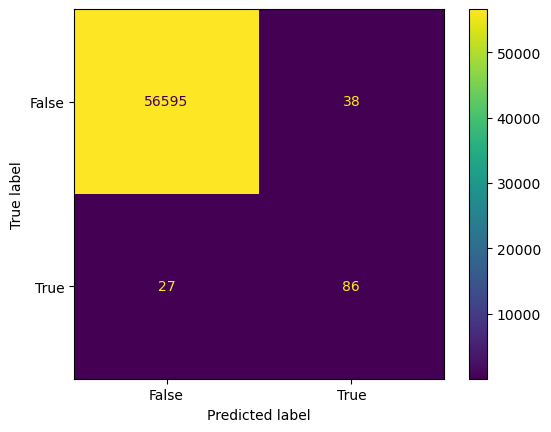

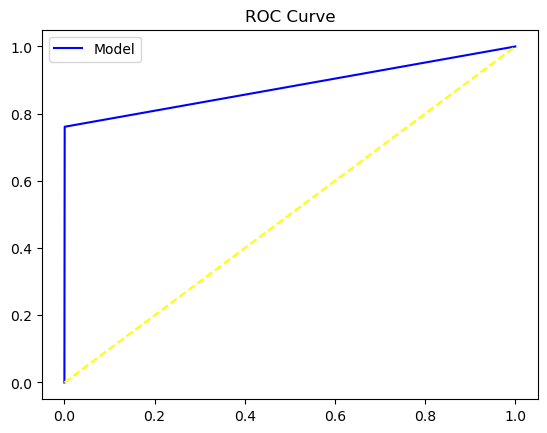

Accuracy: 99.88545448137313
Precision: 69.35483870967742
Recall: 76.10619469026548
F1 Score: 0.7257383966244725
AUC: 88.01954800111069
Classification Report: <function classification_report at 0x0000025F91804940>


[76.10619469026548, 69.35483870967742, 0.7257383966244725, 88.01954800111069]

In [67]:
model_eval(y_test,pred_dt)

In [69]:
# Define the reduced parameter grid
parameters = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [10, 20, 30, 40]
}

# Create GridSearchCV object with reduced parameters and parallel processing
grid_search_dt = GridSearchCV(estimator=dt,
                              param_grid=parameters,
                              scoring='accuracy',
                              cv=5,
                              n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)
best_accuracy = grid_search_dt.best_score_
best_parameters = grid_search_dt.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9994360736628778
Best Parameters: {'max_depth': 9, 'min_samples_split': 20}


In [70]:
pred_gstrain_dt = grid_search_dt.predict(X_train)
pred_gstest_dt = grid_search_dt.predict(X_test)

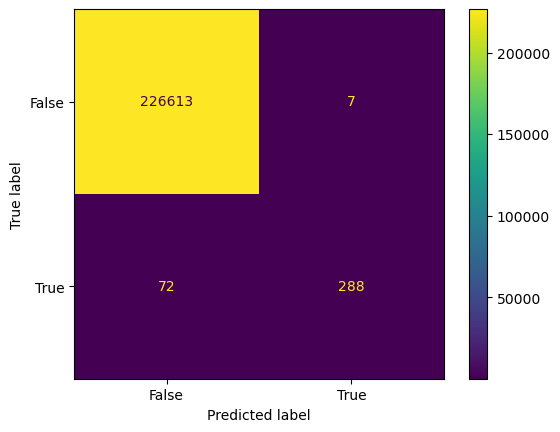

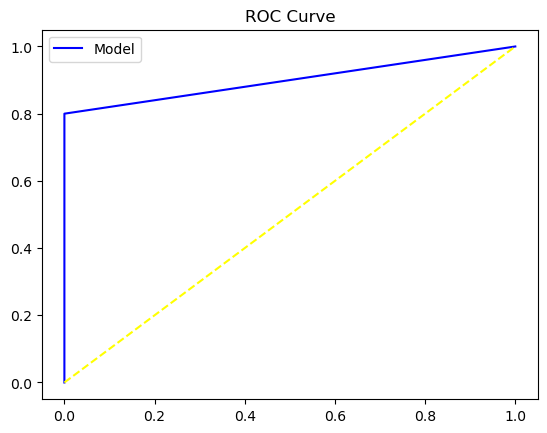

Accuracy: 99.96519517138074
Precision: 97.6271186440678
Recall: 80.0
F1 Score: 0.8793893129770994
AUC: 89.9984555643809
Classification Report: <function classification_report at 0x0000025F91804940>


[80.0, 97.6271186440678, 0.8793893129770994, 89.9984555643809]

In [71]:
model_eval(y_train, pred_gstrain_dt)

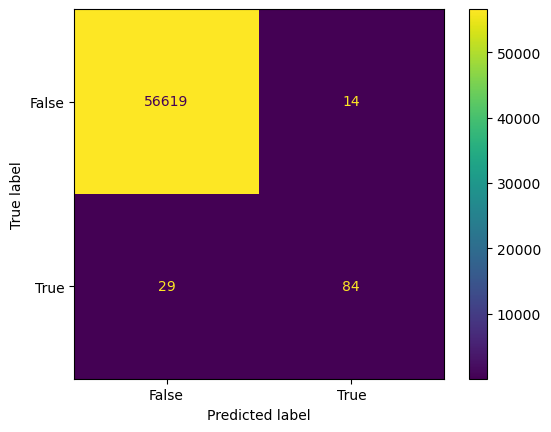

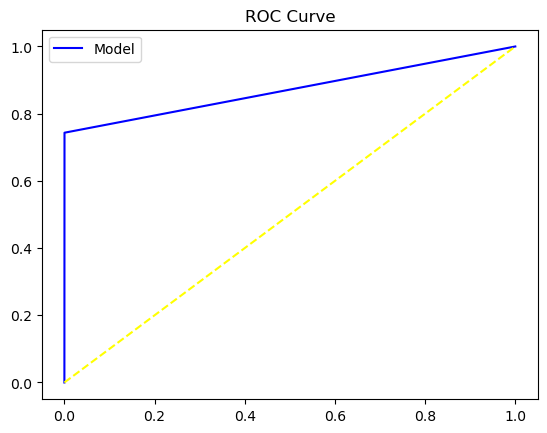

Accuracy: 99.92422373383147
Precision: 85.71428571428571
Recall: 74.33628318584071
F1 Score: 0.7962085308056872
AUC: 87.15578130828067
Classification Report: <function classification_report at 0x0000025F91804940>


[74.33628318584071, 85.71428571428571, 0.7962085308056872, 87.15578130828067]

In [72]:
model_eval(y_test,pred_gstest_dt)


In [73]:
matrix_gs_dt = confusion_matrix(y_test, pred_gstest_dt)
matrix_gs_dt

array([[56619,    14],
       [   29,    84]], dtype=int64)

## Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier(max_depth=110, min_samples_split=10, random_state = 123, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=110, min_samples_split=10, n_jobs=-1,
                       random_state=123)

In [76]:
pred_train_rf = rf.predict(X_train)
pred_rf = rf.predict(X_test)

In [77]:
matrix_rf = confusion_matrix(y_test, pred_rf)
matrix_rf

array([[56623,    10],
       [   22,    91]], dtype=int64)

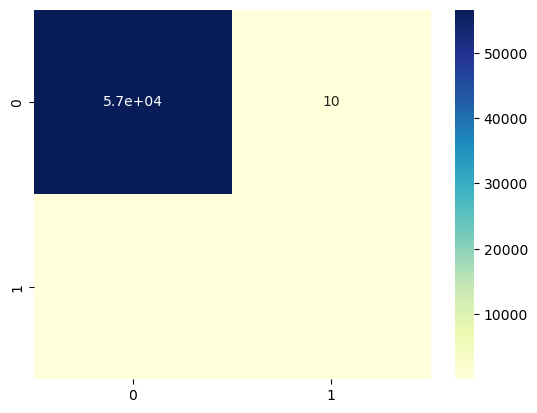

In [78]:
sns.heatmap(data=matrix_rf, annot=True , cmap="YlGnBu")
plt.show()


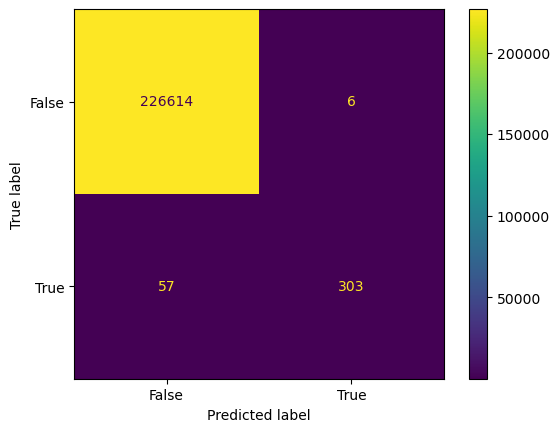

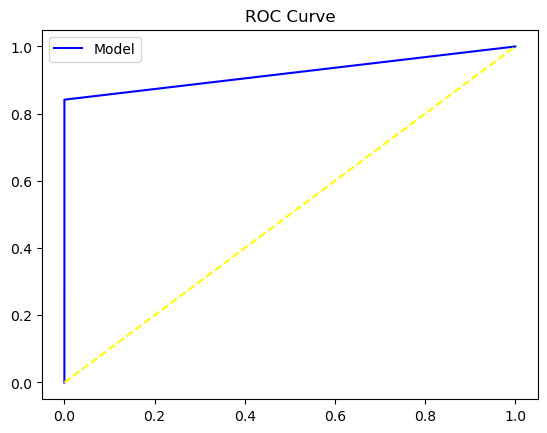

Accuracy: 99.97224425059477
Precision: 98.05825242718447
Recall: 84.16666666666667
F1 Score: 0.905829596412556
AUC: 92.08200953137411
Classification Report: <function classification_report at 0x0000025F91804940>


[84.16666666666667, 98.05825242718447, 0.905829596412556, 92.08200953137411]

In [79]:
model_eval(y_train, pred_train_rf)

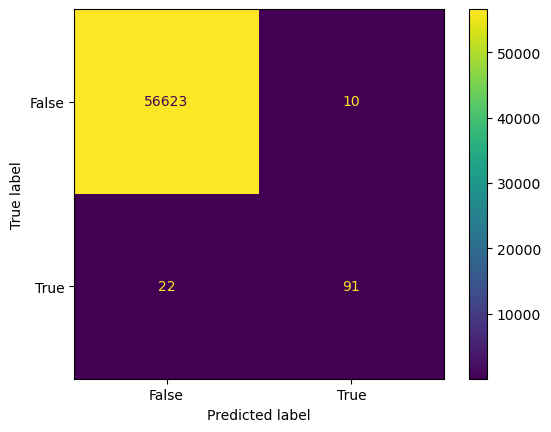

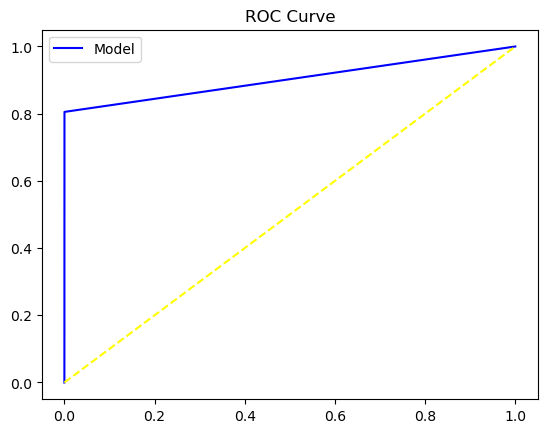

Accuracy: 99.94360836006062
Precision: 90.0990099009901
Recall: 80.53097345132744
F1 Score: 0.8504672897196263
AUC: 90.25665795092108
Classification Report: <function classification_report at 0x0000025F91804940>


[80.53097345132744, 90.0990099009901, 0.8504672897196263, 90.25665795092108]

In [80]:
model_eval(y_test, pred_rf)

In [86]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint



# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 100)
}

# Create RandomizedSearchCV object with reduced parameters and parallel processing
random_search_rf = RandomizedSearchCV(estimator=rf,
                                      param_distributions=param_dist,
                                      n_iter=10,  # Adjust the number of iterations as needed
                                      scoring='accuracy',
                                      cv=2,
                                      n_jobs=-1)

# Fit the randomized search to the training data
random_search_rf.fit(X_train, y_train)

# Retrieve best accuracy and parameters
best_accuracy = random_search_rf.best_score_
best_parameters = random_search_rf.best_params_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9993964225922989
Best Parameters: {'max_depth': 9, 'min_samples_split': 26}


In [88]:
pred_gstrain_rf =random_search_rf.predict(X_train)
pred_gstest_rf = random_search_rf.predict(X_test)

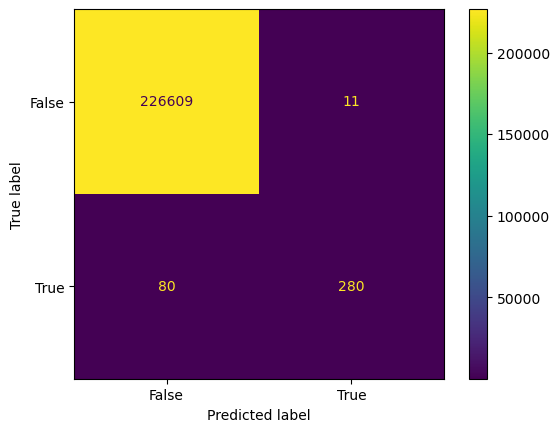

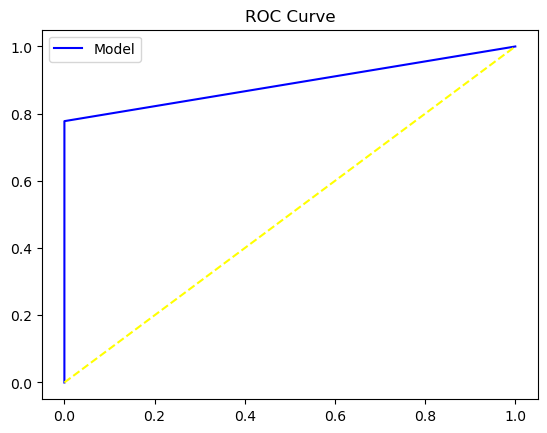

Accuracy: 99.95990836197022
Precision: 96.21993127147766
Recall: 77.77777777777779
F1 Score: 0.860215053763441
AUC: 88.88646191863029
Classification Report: <function classification_report at 0x0000025F91804940>


[77.77777777777779, 96.21993127147766, 0.860215053763441, 88.88646191863029]

In [89]:
model_eval(y_train, pred_gstrain_rf)

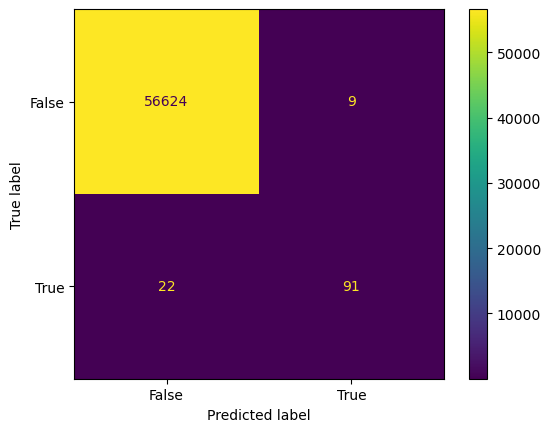

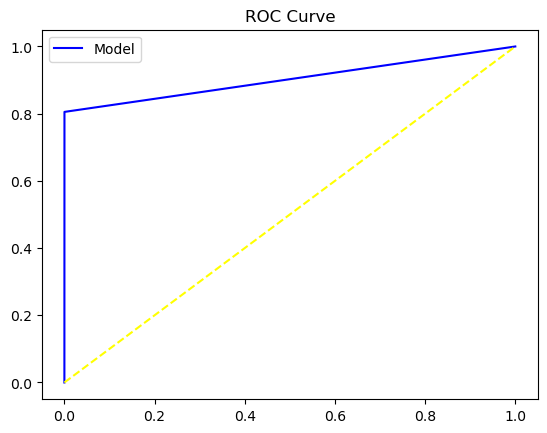

Accuracy: 99.94537059880872
Precision: 91.0
Recall: 80.53097345132744
F1 Score: 0.8544600938967136
AUC: 90.25754082839535
Classification Report: <function classification_report at 0x0000025F91804940>


[80.53097345132744, 91.0, 0.8544600938967136, 90.25754082839535]

In [90]:
model_eval(y_test, pred_gstest_rf)

In [91]:
matrix_gs_rf = confusion_matrix(y_test, pred_gstest_dt)
matrix_gs_rf

array([[56619,    14],
       [   29,    84]], dtype=int64)

## XG Boost

In [92]:
import xgboost as xgb

In [93]:
xgclf =xgb.XGBRFClassifier()
xgclf.fit(X_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [94]:
pred_train_xgb = xgclf.predict(X_train)
pred_xgb = xgclf.predict(X_test)

In [95]:
matrix_xgb = confusion_matrix(y_test,pred_xgb)
matrix_xgb

array([[56620,    13],
       [   17,    96]], dtype=int64)

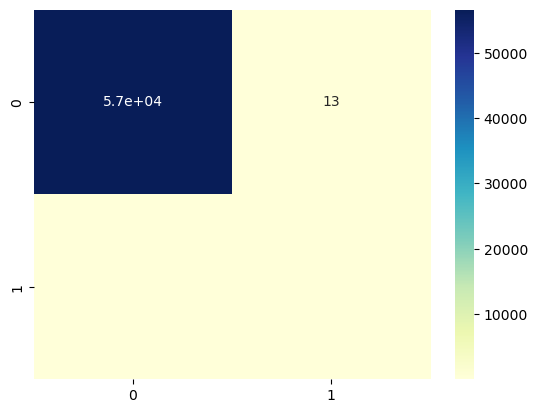

In [96]:
sns.heatmap(data=matrix_xgb, annot=True , cmap="YlGnBu")
plt.show() 

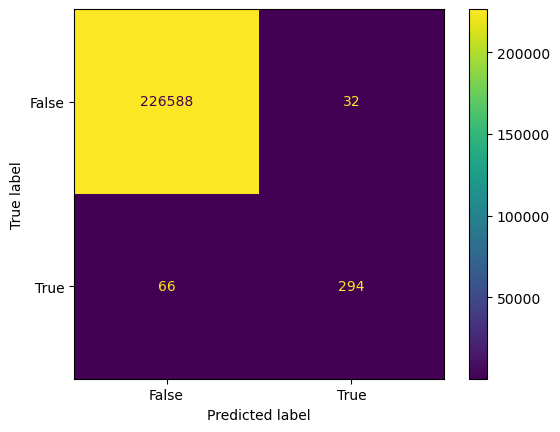

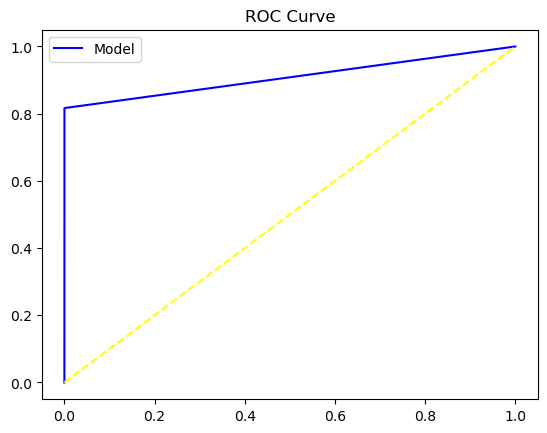

Accuracy: 99.95682438981407
Precision: 90.1840490797546
Recall: 81.66666666666667
F1 Score: 0.8571428571428572
AUC: 90.82627305621746
Classification Report: <function classification_report at 0x0000025F91804940>


[81.66666666666667, 90.1840490797546, 0.8571428571428572, 90.82627305621746]

In [97]:
model_eval(y_train,pred_train_xgb)

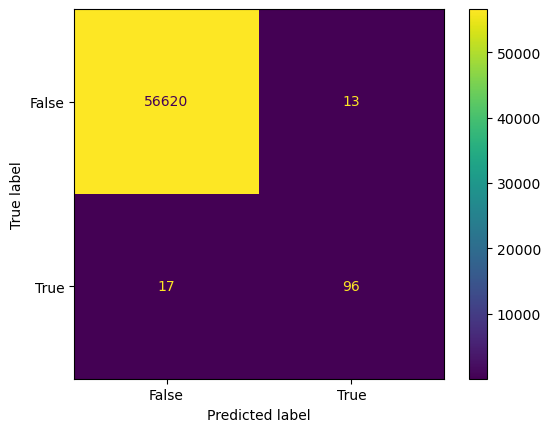

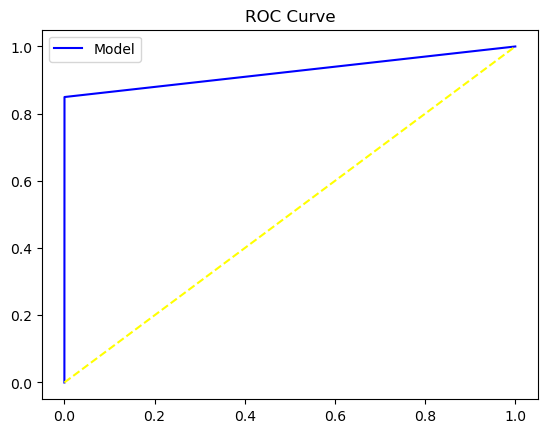

Accuracy: 99.94713283755684
Precision: 88.07339449541286
Recall: 84.95575221238938
F1 Score: 0.8648648648648649
AUC: 92.46639869902926
Classification Report: <function classification_report at 0x0000025F91804940>


[84.95575221238938, 88.07339449541286, 0.8648648648648649, 92.46639869902926]

In [98]:
model_eval(y_test,pred_xgb)

##### XG Boost Classifier gives 99. 97% Accuracy

## Hyperparameter Tuning

In [99]:

from sklearn.model_selection import RandomizedSearchCV

In [100]:
param_dist_xgb = {
    'n_estimators': [50,100,150,200,300,400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6]
}


In [101]:
gs = RandomizedSearchCV(xgclf,param_dist_xgb,verbose = 2)

In [102]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   2.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   3.0s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=100; total time=   1.4s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=100; total time=   1.6s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=100; total time=   2.3s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=100; total time=   1.5s
[CV] END ...learning_rate=0.3, max_depth=4, n_estimators=100; total time=   1.7s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=300; total time=   4.8s
[CV] END ...learning_rate=0.3, max_depth=6, n_es

RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             ma...
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             random_state=None, reg_alpha=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400]},
                   verbose=2)

In [103]:
#Best Hyper paramters for XG Boost
print('Best Parameters for XG Boost :',gs.best_params_)

Best Parameters for XG Boost : {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3}


In [104]:
pred_train_xgb_hpt = gs.predict(X_train)
preds_xgb_hpt = gs.predict(X_test)

In [105]:
matrix_xgb_hpt = confusion_matrix(y_test,preds_xgb_hpt)
matrix_xgb_hpt

array([[56631,     2],
       [   33,    80]], dtype=int64)

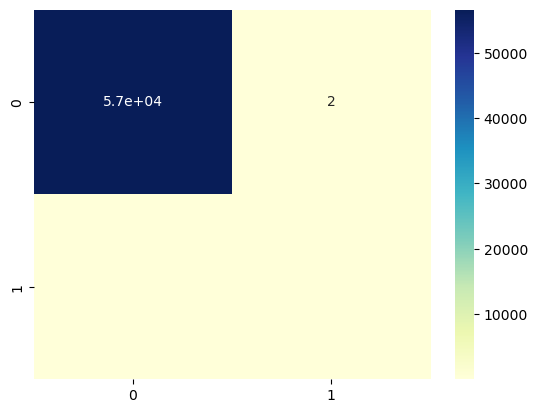

In [106]:
sns.heatmap(data=matrix_xgb_hpt, annot=True , cmap="YlGnBu")
plt.show() 

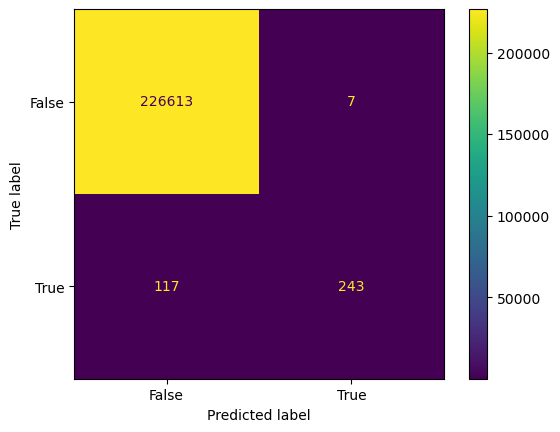

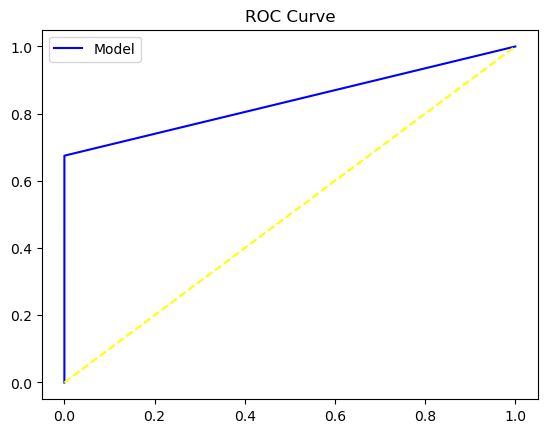

Accuracy: 99.94536963609129
Precision: 97.2
Recall: 67.5
F1 Score: 0.7967213114754098
AUC: 83.74845556438089
Classification Report: <function classification_report at 0x0000025F91804940>


[67.5, 97.2, 0.7967213114754098, 83.74845556438089]

In [107]:
model_eval(y_train,pred_train_xgb_hpt)

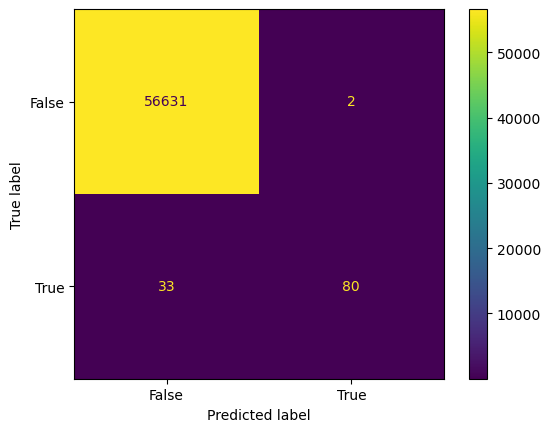

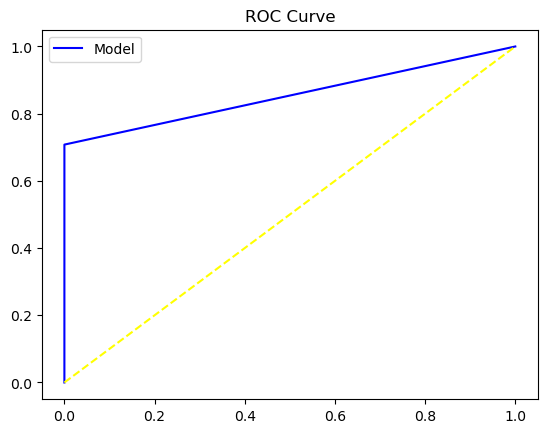

Accuracy: 99.93832164381631
Precision: 97.5609756097561
Recall: 70.79646017699115
F1 Score: 0.8205128205128205
AUC: 85.39646433354704
Classification Report: <function classification_report at 0x0000025F91804940>


[70.79646017699115, 97.5609756097561, 0.8205128205128205, 85.39646433354704]

In [108]:
model_eval(y_test,preds_xgb_hpt)

XG Boosting with hyper parameter tuning gives 99.94% Accuracy

Model Evaluation Now we have our best set models, now we move onto testing them on different metrices so as to know which one works best overall for us.

LogisticRegression Logical Regression with hyperparameter Tuning Decision Tree Decision Tree with hyperparameter Tuning Random Forest Random Forest with hyperparameter Tuning XG Boost XG Boost with hyperparmeter Tuning we'll evaluate model using:

ROC AUC Score

ROC Curve

Confusion Matrix

Classification report

In [109]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test,pred))
print('Logistic Regression_GridSearchCV: ', roc_auc_score(y_test,lrpred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, pred_dt))
print('Decision Tree Classifier_GridSearchCV: ', roc_auc_score(y_test, pred_gstest_dt))
print('Random Forest Classifier: ', roc_auc_score(y_test, pred_rf))
print('Random Forest Classifier_GridSearch_CV: ', roc_auc_score(y_test, pred_gstest_rf))
print('XG Boost Classifier: ', roc_auc_score(y_test, pred_xgb))
print('xgb_GridSearchCV: '), roc_auc_score(y_test,preds_xgb_hpt)

Logistic Regression:  0.9507582511150429
Logistic Regression_GridSearchCV:  0.9508023949887562
Decision Tree Classifier:  0.8801954800111069
Decision Tree Classifier_GridSearchCV:  0.8715578130828067
Random Forest Classifier:  0.9025665795092108
Random Forest Classifier_GridSearch_CV:  0.9025754082839536
XG Boost Classifier:  0.9246639869902925
xgb_GridSearchCV: 


(None, 0.8539646433354705)

Logistic Regression Classifier has best roc_auc_score ROC is a probabilistic curve, and AUC represents the degree or measure of separability. It tells how much
the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. The ROC curve is a graphical representation of the contrast between true positive rates (TPR) and false positive rates (FPR) at various thresholds.

In [110]:
#Evaluating using ROC Curve
log_fpr, log_tpr, log_threshold = roc_curve(y_test, pred)
log_gridsearch_fpr,log_gridsearch_tpr,log_gridsearch_threshold = roc_curve(y_test,lrpred)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, pred_dt)
dt_gridsearch_fpr, dt_gridsearch_tpr, dt_gridsearch_threshold = roc_curve(y_test, pred_gstest_dt)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, pred_rf)
rf_gridsearch_fpr, rf_gridsearch_tpr, rf_gridsearch_threshold = roc_curve(y_test, pred_gstest_rf)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, pred_xgb)
gridsearch_fpr,gridsearch_tpr,gridsearch_threshhold = roc_curve(y_test,preds_xgb_hpt)

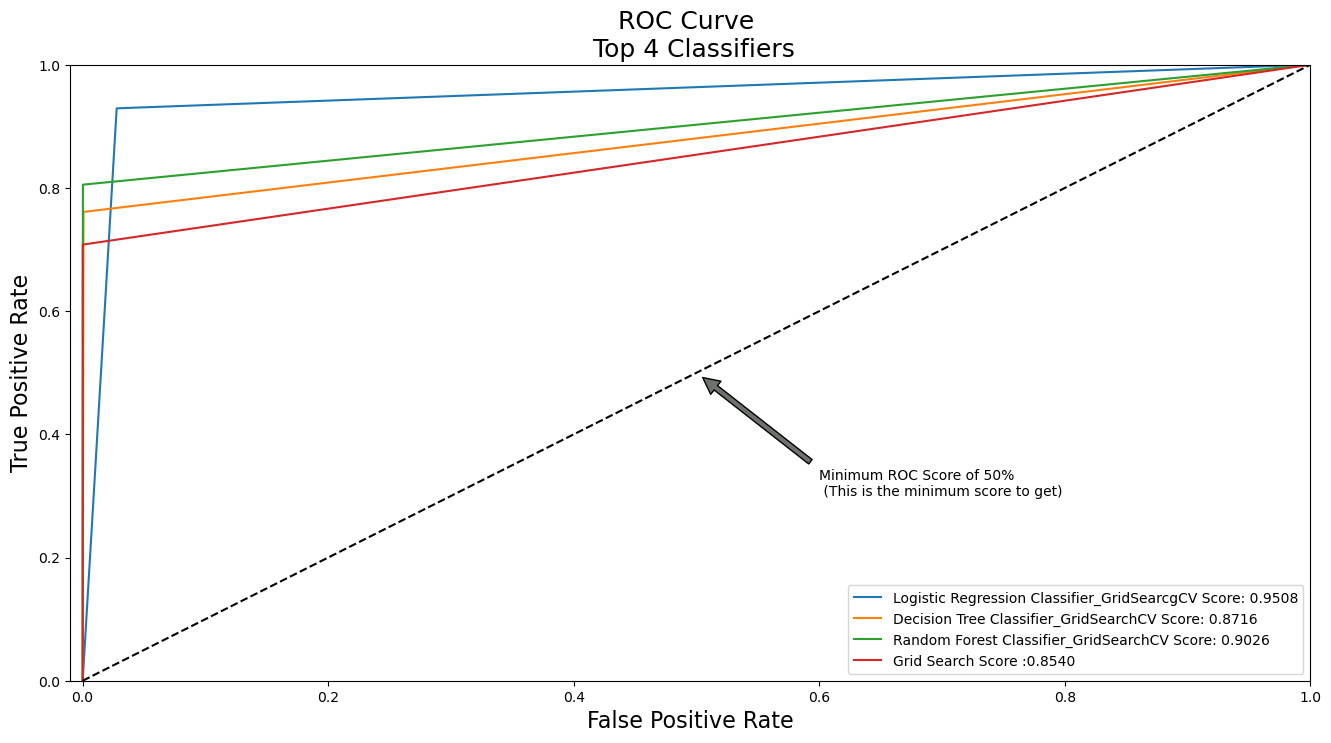

In [111]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier_GridSearcgCV Score: {:.4f}'.format(roc_auc_score(y_test, lrpred)))
plt.plot(dt_fpr,dt_tpr, label='Decision Tree Classifier_GridSearchCV Score: {:.4f}'.format(roc_auc_score(y_test, pred_gstest_dt)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier_GridSearchCV Score: {:.4f}'.format(roc_auc_score(y_test, pred_gstest_rf)))
plt.plot(gridsearch_fpr,gridsearch_tpr,label = 'Grid Search Score :{:.4f}'.format(roc_auc_score(y_test,preds_xgb_hpt)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()

Logistic Regression Classifier GridSearch has best ROC Curve followed by Random Forest Classifier.

[Text(0, 0.5, ''), Text(0, 1.5, '')]

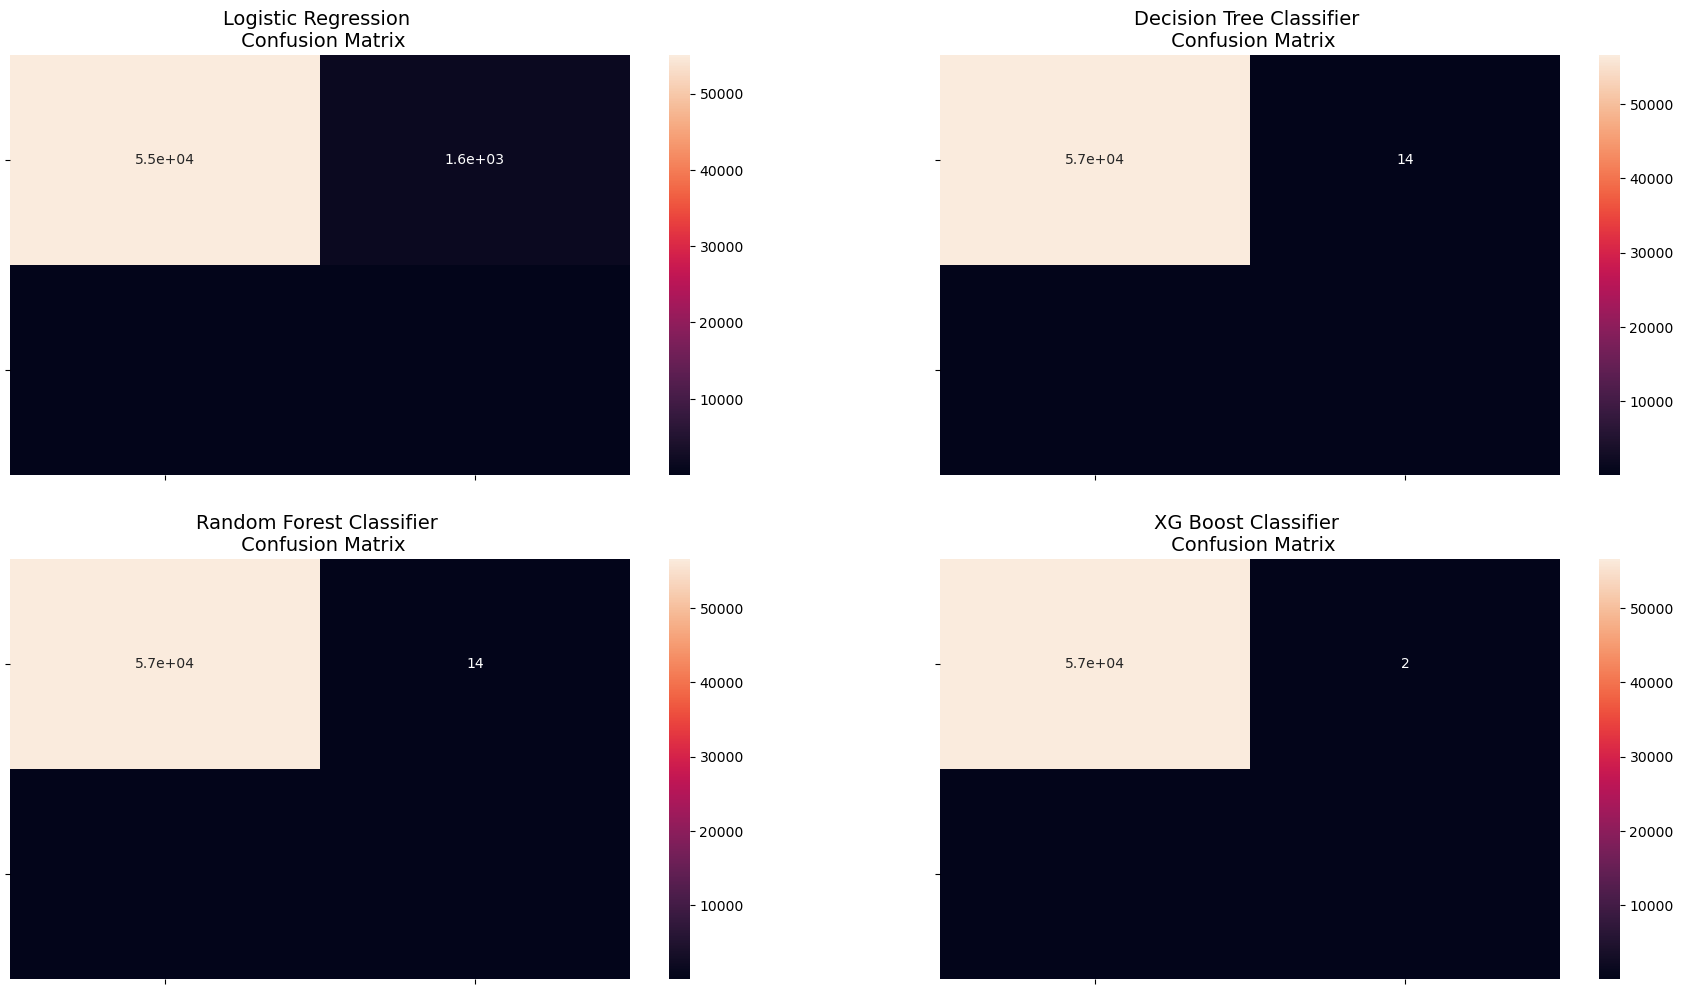

In [112]:
#Confusion Matrix

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(matrix, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(matrix_gs_dt, ax=ax[0][1], annot=True)
ax[0][1].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(matrix_gs_rf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(matrix_xgb_hpt, ax=ax[1][1], annot=True)
ax[1][1].set_title("XG Boost Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

From the Confusion Metrix, we can see that Logical Regression outperforms others followed by Random Forest and Decision Tree

Logical Regression Model



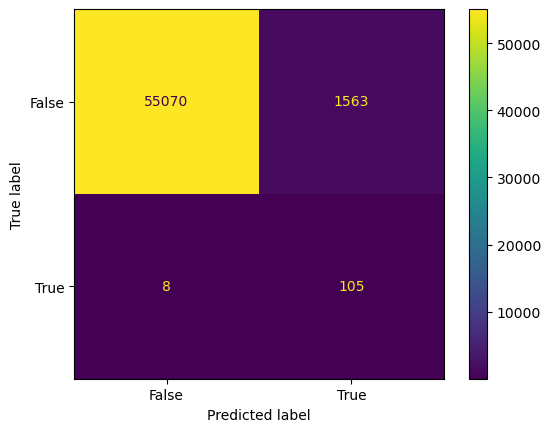

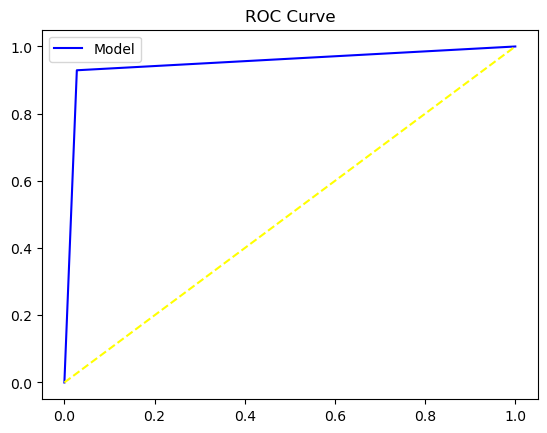

Accuracy: 97.23152292672611
Precision: 6.294964028776978
Recall: 92.92035398230088
F1 Score: 0.11791128579449749
AUC: 95.08023949887561
Classification Report: <function classification_report at 0x0000025F91804940>
Decision Tree Model



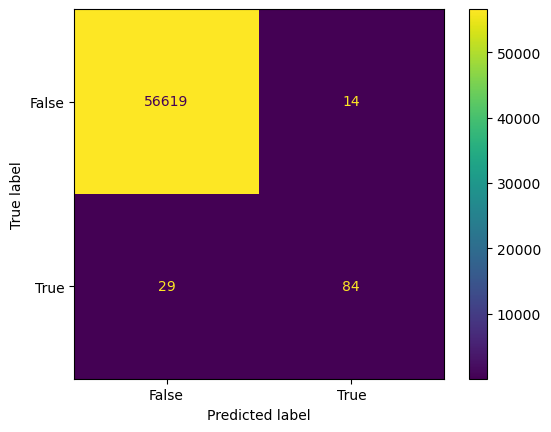

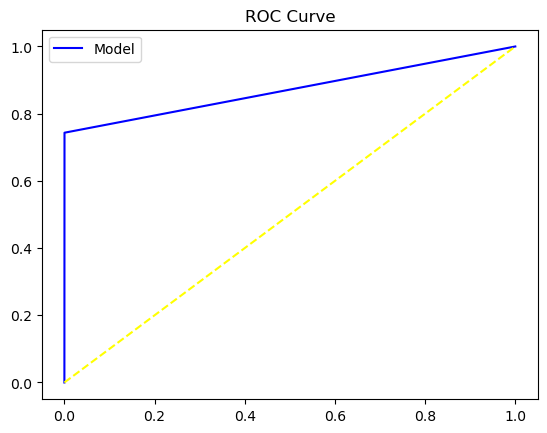

Accuracy: 99.92422373383147
Precision: 85.71428571428571
Recall: 74.33628318584071
F1 Score: 0.7962085308056872
AUC: 87.15578130828067
Classification Report: <function classification_report at 0x0000025F91804940>
Random Forest Model



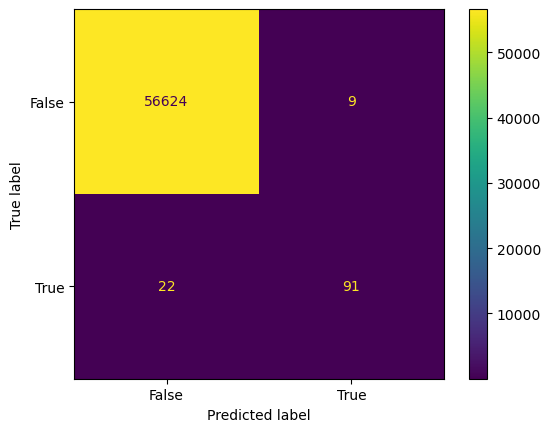

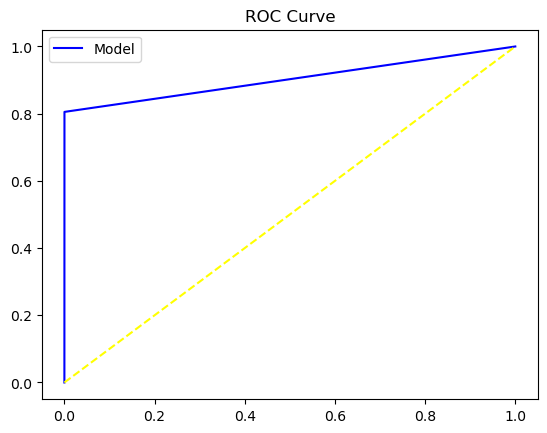

Accuracy: 99.94537059880872
Precision: 91.0
Recall: 80.53097345132744
F1 Score: 0.8544600938967136
AUC: 90.25754082839535
Classification Report: <function classification_report at 0x0000025F91804940>
XG Boost Model



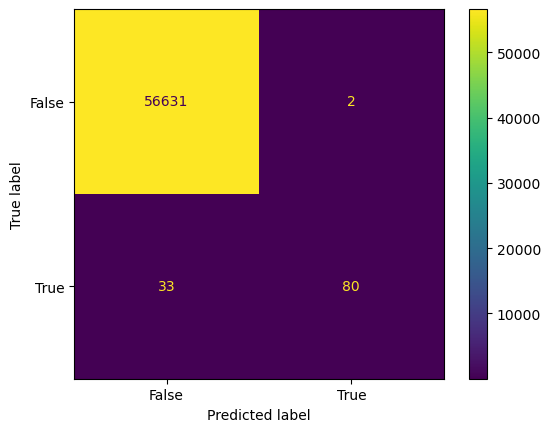

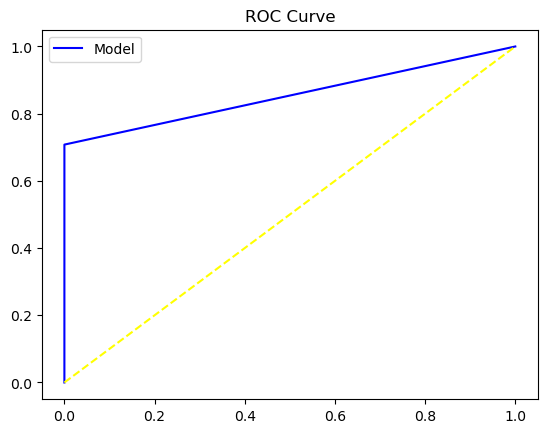

Accuracy: 99.93832164381631
Precision: 97.5609756097561
Recall: 70.79646017699115
F1 Score: 0.8205128205128205
AUC: 85.39646433354704
Classification Report: <function classification_report at 0x0000025F91804940>


(None,
 [70.79646017699115, 97.5609756097561, 0.8205128205128205, 85.39646433354704])

In [113]:
#Evaluation using classification report

Compare = print('Logical Regression Model\n'),model_eval(y_test,lrpred)
print('Decision Tree Model\n'),model_eval(y_test,pred_gstest_dt)
print('Random Forest Model\n'),model_eval(y_test,pred_gstest_rf)
print('XG Boost Model\n'),model_eval(y_test,preds_xgb_hpt)

In [114]:

acc_score = accuracy_score(y_test, lrpred)
print(f'Logistic Regression Model Accuracy is: {round(acc_score * 100, 2)}%')
accc_score = accuracy_score(y_test, pred_gstest_dt)
print('Decision Tree Model Accuracy is: ' + str(round(accc_score * 100, 2)) + '%')
acccc_score = accuracy_score(y_test, pred_gstest_rf)
print('Random Forest Classifier Accuracy: ' + str(round(acccc_score * 100, 2)) + '%')
ac_score = accuracy_score(y_test, preds_xgb_hpt)
print('XG Boost Model with hyper tuning: ' + str(round(ac_score * 100, 2)) + '%')

Logistic Regression Model Accuracy is: 97.23%
Decision Tree Model Accuracy is: 99.92%
Random Forest Classifier Accuracy: 99.95%
XG Boost Model with hyper tuning: 99.94%


 Random Forest Classifier gives a better accuracy score of 99.95%

Precision: The ratio of true positive predictions to the total number of positive predictions (including both true positives and false positives).

Recall (Sensitivity): The ratio of true positive predictions to the total number of actual positives.

F1 Score: The harmonic mean of precision and recall. It is useful when you need to balance precision and recall.

ROC AUC Score: As discussed earlier, the area under the receiver operating characteristic curve is a performance measurement for classification problems at various threshold settings. It helps evaluate the model's ability to distinguish between classes.

### Conclusion:

Random Forest has given accuracy of 99.95% 
with precision of 91.0
and AUC of 90.25.

For future business predcition to avoid fraudualent trancition we will deploy the Random Forest Model to check the fraud and non-fraud cases.

# Model Deployment

In [131]:
import pickle

As we have have maximum accuracy of 99.95% in Random Forest, so we will use Random Forest Model in deployment.

In [132]:
pickle.dump(rf,open('rf.pkl','wb')) 

In [133]:
import streamlit as st

In [134]:
ls


 Volume in drive C is OS
 Volume Serial Number is 6811-6254

 Directory of C:\Users\Asus\Capstone Project

19-03-2024  16:51    <DIR>          .
10-03-2024  23:46    <DIR>          ..
02-03-2024  16:48    <DIR>          .ipynb_checkpoints
19-03-2024  16:51         2,919,739 Capstone_Project.ipynb
19-03-2024  16:50               652 ccfd.py
18-03-2024  08:31         3,624,444 Credit Card Fraud Detection-Copy1.ipynb
24-02-2024  13:07        23,550,830 credit.csv
17-03-2024  23:30         1,458,599 credit_card_fraud_detection.ipynb
28-01-2024  18:45       123,850,131 creditcard.xlsx
02-03-2024  17:29             7,207 dt.pkl
25-02-2024  11:01             1,212 lr.pkl
19-03-2024  16:54         2,040,110 rf.pkl
               9 File(s)    157,452,924 bytes
               3 Dir(s)  94,851,497,984 bytes free


In [135]:
import pickle
reloaded_model = pickle.load(open('rf.pkl','rb'))
reloaded_model.predict([[-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00]])

array([1], dtype=int64)

In [136]:
reloaded_model.predict([[-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77]])

array([0], dtype=int64)

In [ ]:
%%writefile ccfd.py
import streamlit as st
import pickle
import numpy as np

with open("rf.pkl","rb") as model_file:
    reloaded_model = pickle.load(model_file)


st.title("Credit Card Fraud Detection")
ip = st.text_input("Enter all the features","Type the features")

ip_split = ip.split(",")                    
submit = st.button("Submit")


if submit:
    features = np.asarray(ip_split,dtype=np.float64).reshape(1,-1)
    
    prediction = reloaded_model.predict(features)
    
    if prediction[0] == 0:
        st.write("Legitimate Transaction")
    else:
        st.write("Fradulent Transaction")
    

In [ ]:
!streamlit run ccfd.py & npx localtunnel --port 8501